# **COVID-19 Data Visualization with R**
**By: Krish Patel**

**Date: July 28th 2023**

## **Table of Contents**

| Section | Title                                                   |
|---------|---------------------------------------------------------|
| 1.0     | [Introduction to the Project](#1.0-Introduction-to-the-Project) |
| 2.0     | [Data Gathering](#2.0-Data-Gathering)                  |
| 3.0     | [Data Preparation](#3.0-Data-Preparation)              |
| 4.0     | [Creating Functions for Data Visualization and Analysis](#4.0-Creating-Functions-for-Data-Visualization-and-Analysis) |
| 5.0     | [Creating a Shiny Dashboard](#5.0-Creating-a-Shiny-Dashboard) |
| 6.0     | [Summary and Conclusion](#6.0-Summary-and-Conclusion)  |
| 7.0     | [References](#7.0-References)                          |

---

## **Section 1: Introduction**

### **1.1 About the Project**

This project is focused on analyzing COVID-19 data to create meaningful visualizations. It involves gathering raw data, cleaning and preprocessing it, and building an interactive Shiny Dashboard to allow users to dynamically explore and understand the trends in the pandemic.

### **1.2 Overview of Project Steps & Objectives**

1. **Data Gathering**: The raw data was collected from the [Johns Hopkins CSSE COVID-19 GitHub Repository](https://github.com/CSSEGISandData/COVID-19/tree/master/csse_covid_19_data/csse_covid_19_daily_reports_us).
2. **Data Preparation**: Cleaning the raw data to address missing values, filter for relevant columns, and transform the dataset for analysis.
3. **Visualization and Analysis**: Creating reusable R functions to generate dynamic visualizations and uncover data trends such as total cases, daily cases, and mortality rates.
4. **Building the Dashboard**: Developing an interactive Shiny Dashboard to allow users to visualize trends by selecting parameters like state, date range, and analysis type.
5. **Summary and Conclusion**: Summarizing key insights gained from the data and reflecting on the results of the visualizations and dashboard.

---
## **Section 2: Data Gathering**

In this section, the raw COVID-19 data is collected from the Johns Hopkins CSSE COVID-19 GitHub Repository. The data includes daily reports on various metrics such as confirmed cases, deaths, and recoveries. This data will serve as the foundation for further cleaning, preprocessing, and analysis. The focus will be on ensuring the data is sourced accurately and is ready for subsequent preparation and visualization tasks.

### **Data Collecting**

we collect raw COVID-19 data from the Johns Hopkins CSSE COVID-19 GitHub Repository. The code dynamically generates URLs for daily reports based on a specified date range and fetches the corresponding CSV files. These files are read and combined into a single dataset for further processing. This ensures that we have up-to-date and comprehensive data for analysis.

In [1]:
# Load libraries
library(tidyverse)
library(lubridate)

# Define start and end dates
start_date <- ymd("2020-04-12")
end_date <- Sys.Date() - 1

# Create a sequence of dates
dates <- seq.Date(start_date, end_date, by = "day")

# Base URL for the CSV files
base_url <- "https://github.com/CSSEGISandData/COVID-19/blob/master/csse_covid_19_data/csse_covid_19_daily_reports_us/"

# Create URLs for each date
date_urls <- dates %>%
  format("%m-%d-%Y") %>%
  paste0(base_url, ., ".csv?raw=true")

# Initialize an empty tibble to store all data
all_data <- tibble()

# Loop through URLs to read and combine data
for (url in date_urls) {
  temp <- tryCatch(
    {
      read_csv(url)  # Attempt to read CSV
    },
    error = function(e) {
      message(paste("Failed to fetch data for URL:", url))  # Handle errors gracefully
      return(NULL)  # Return NULL if reading fails
    }
  )
  
  if (!is.null(temp)) {
    all_data <- bind_rows(all_data, temp)  # Append data if successfully fetched
  }
}

# Print success message if data is collected
if (nrow(all_data) > 0) {
  print("COVID data collected successfully from Johns Hopkins CSSE COVID-19 GitHub Repository")
} else {
  print("No data was collected. Please check the URLs or the network connection.")
}

COVID data collected successfully from Johns Hopkins CSSE COVID-19 GitHub Repository


In [ ]:
# Save the combined data to a CSV file
write_csv(all_data, "C:/Users/Krish Patel/Desktop/project 3/covid_data.csv")

---
## **Section 3: Data Preparation**

After reading the CSV file into the `covid_data` dataframe, several data cleaning and preparation steps were undertaken to ensure the dataset was well-structured and suitable for analysis. Below is a summary of the key steps:

1. **Summarizing Column Structure**:
   - First, a detailed summary of each column was created to assess the structure, including data types, total values, missing values, and filled values. This helped in understanding the completeness and relevance of each column for our analysis.

2. **Dropping Unnecessary Columns**:
   - Certain columns, such as `FIPS`, `Lat`, `Long_`, `UID`, `ISO3`, `People_Hospitalized`, and `Last_Update`, were removed from the dataframe. These columns were deemed unnecessary as they either had high missing values, duplicated information available in other columns, or were irrelevant for our analysis.

3. **Changing Data Types**:
   - Adjustments were made to ensure each column had the most appropriate data type. For instance, `Date` was converted to a date format to facilitate time-based analysis, while other columns were set to integer or numeric types as needed. This ensured smooth functionality for calculations and visualizations.

4. **Reordering Columns**:
   - The `Date` column was positioned directly after the `Province_State` and `Country_Region` columns to provide a more logical structure for time-series analysis at both state and national levels.

These data cleaning steps set the foundation for reliable data analysis, removing noise and ensuring consistency across the dataset.


In [3]:
covid_data <- read.csv("C:/Users/Krish Patel/Desktop/project 3/covid_data.csv")  

### **Column Structure in `covid_data`**

1. **Identify Column Names**:
   - Retrieve the names of each column to label them in the summary.

2. **Determine Data Type for Each Column**:
   - Check the data type (e.g., numeric, character) of each column to understand the kind of data it holds.

3. **Calculate Total Values**:
   - Count the total number of rows in the dataset, representing the total possible entries for each column.

4. **Count Missing Values**:
   - Calculate the number of missing (`NA`) values for each column to assess data completeness.

5. **Count Non-Missing (Given) Values**:
   - Calculate the number of non-missing values for each column to understand the available data.

6. **Display Summary Table**:
   - Present the compiled information in a structured table for easy interpretation.


In [4]:
# Check structure: total values, missing values, given values, and column type for each column
column_structure <- data.frame(
  Column = colnames(covid_data),
  Type = sapply(covid_data, class),
  Total_Values = nrow(covid_data),
  Missing_Values = sapply(covid_data, function(x) sum(is.na(x))),
  Given_Values = sapply(covid_data, function(x) sum(!is.na(x)))
)

# Display the result
column_structure

,Column,Type,Total_Values,Missing_Values,Given_Values
,<chr>,<chr>,<int>,<int>,<int>
Province_State,Province_State,character,61614,0,61614
Country_Region,Country_Region,character,61614,0,61614
Last_Update,Last_Update,character,61614,19,61595
Lat,Lat,numeric,61614,2142,59472
Long_,Long_,numeric,61614,2142,59472
Confirmed,Confirmed,integer,61614,0,61614
Deaths,Deaths,integer,61614,0,61614
Recovered,Recovered,integer,61614,46492,15122
Active,Active,integer,61614,46492,15122


### **Dropping Unnecessary Columns from `covid_data`**

The following columns are being removed to streamline the dataset for analysis:

1. **FIPS**: Primarily used in the U.S. to identify counties. This information is redundant as we already have `Province_State` and `Country_Region` for geographic identification.

2. **Lat and Long_**: Latitude and Longitude are useful for geospatial mapping but are unnecessary for general COVID-19 data analysis focused on cases, deaths, and recoveries.

3. **UID and ISO3**: Unique identifiers for each entry and ISO country codes. These are redundant because `Country_Region` provides sufficient information for identifying geographic areas.

4. **People_Hospitalized**: This column has a high number of missing values (`NA`), which makes it unreliable for analysis. The `Hospitalization_Rate` column offers a more consistent metric for hospitalization data.

5. **Last_Update**: Tracks the last date and time the data was updated, but this information is redundant as we already have `Date` to represent the timeline for analysis.

6. **Incident_Rate**: This metric, which measures the incidence of cases per population, is more applicable in detailed epidemiological studies and is not essential for tracking case and death trends alone.
   
7. **Case_Fatality_Ratio**: While this provides the ratio of deaths to confirmed cases, it’s redundant for our analysis as we are directly analyzing cases and deaths over time.

8. **Testing_Rate**: Testing rates are important in testing capacity studies but are not directly relevant to analyzing case and death progression.

9. **Hospitalization_Rate**: Due to a high number of missing values, this column is unreliable and does not add significant value to our case and death trend analysis.

10. **People_Tested**: This column also contains many missing values and overlaps with other testing metrics available in the dataset.

11. **Mortality_Rate**: This rate could be calculated if necessary but is redundant for our purposes, as we’re already examining death trends directly.

Removing these columns will simplify the dataset, focusing only on the most relevant information for COVID-19 analysis.

In [5]:
# Drop unnecessary columns from covid_data
covid_data <- covid_data %>%
  select(-FIPS, -Lat, -Long_, -UID, -ISO3, -People_Hospitalized, -Last_Update, 
         -Incident_Rate, -Case_Fatality_Ratio, -Testing_Rate, -Hospitalization_Rate, 
         -People_Tested, -Mortality_Rate)

# Display the structure to confirm the columns were removed
str(covid_data)


'data.frame':	61614 obs. of  8 variables:
 $ Province_State    : chr  "Alabama" "Alaska" "American Samoa" "Arizona" ...
 $ Country_Region    : chr  "US" "US" "US" "US" ...
 $ Confirmed         : int  3667 272 0 3542 1280 22201 11819 12035 1625 49 ...
 $ Deaths            : int  93 8 0 115 27 632 808 554 49 0 ...
 $ Recovered         : int  NA 66 NA NA 367 NA NA NA 191 0 ...
 $ Active            : int  NA 198 NA NA 886 NA NA NA 1385 49 ...
 $ Total_Test_Results: int  NA NA NA NA NA NA NA NA 17870 NA ...
 $ Date              : chr  "2020-04-12" "2020-04-12" "2020-04-12" "2020-04-12" ...


### **Data Type Adjustments and Column Reordering for `covid_data`**

To optimize `covid_data` for analysis, the following adjustments are made:

1. **Convert `Date` Column to Date Type**:
   - **Current Type**: Character (`chr`)
   - **Recommended Type**: Date
   - **Reason**: Converting `Date` to Date type enables easier manipulation of time-based data, including operations like filtering by date range, time-series analysis, and plotting trends.

2. **Convert `Province_State` and `Country_Region` Columns to Factor Type**:
   - **Current Type**: Character (`chr`)
   - **Recommended Type**: Factor
   - **Reason**: These columns represent categorical data with a fixed set of unique values (states and countries). Converting them to factors enhances memory usage and performance, especially during grouping and summarization.

3. **Reorder Columns to Place `Date` after `Province_State` and `Country_Region`**:
   - **Reason**: Positioning the `Date` column directly after the geographic identifiers (`Province_State` and `Country_Region`) enhances readability and aligns with the logical sequence of the data.

These adjustments streamline the dataset, making it more organized and efficient for analysis, especially for time-series and categorical operations.


In [6]:
# Convert Date column to Date type
covid_data$Date <- as.Date(covid_data$Date)

# Convert Province_State and Country_Region to factors
covid_data$Province_State <- as.factor(covid_data$Province_State)
covid_data$Country_Region <- as.factor(covid_data$Country_Region)

# Move Date column after Province_State and Country_Region
covid_data <- covid_data %>% select(Province_State, Country_Region, Date, everything())

# Confirm the changes in data structure
str(covid_data)



'data.frame':	61614 obs. of  8 variables:
 $ Province_State    : Factor w/ 59 levels "Alabama","Alaska",..: 1 2 3 4 5 6 7 8 9 10 ...
 $ Country_Region    : Factor w/ 1 level "US": 1 1 1 1 1 1 1 1 1 1 ...
 $ Date              : Date, format: "2020-04-12" "2020-04-12" ...
 $ Confirmed         : int  3667 272 0 3542 1280 22201 11819 12035 1625 49 ...
 $ Deaths            : int  93 8 0 115 27 632 808 554 49 0 ...
 $ Recovered         : int  NA 66 NA NA 367 NA NA NA 191 0 ...
 $ Active            : int  NA 198 NA NA 886 NA NA NA 1385 49 ...
 $ Total_Test_Results: int  NA NA NA NA NA NA NA NA 17870 NA ...


### **Adding New Columns: `Case_Growth_Rate` and `Death_Rate`**

To enhance our analysis of COVID-19 trends, we introduced two new calculated columns: **Case Growth Rate** and **Death Rate**. These metrics provide deeper insights into the progression of cases and the severity of outcomes.

1. **Case Growth Rate**: This column calculates the daily percentage increase in confirmed cases. By observing how cases grow day-over-day within each state, we can identify periods of rapid case increase or stabilization. Calculating this metric involves:
   - Arranging the data by `Province_State` and `Date` to ensure that growth is calculated in chronological order within each state.
   - Using the formula: **(Confirmed - Previous Day Confirmed) / Previous Day Confirmed * 100**
   - Setting the first entry in each state to `NA` since it has no previous day data for comparison.

2. **Death Rate**: This metric shows the percentage of confirmed cases that have resulted in death, giving a sense of the severity of the outbreak in each state over time. The formula used is: **Deaths / Confirmed * 100**

These columns allow us to track both the rate at which cases are rising and the lethality of the virus over time, providing critical insights for assessing public health responses and policy impacts.



In [7]:
# Arrange the data by state and date, then calculate Case Growth Rate and Death Rate
covid_data <- covid_data %>%
  arrange(Province_State, Date) %>%  # Ensure data is ordered by state and date
  
  # Add Case Growth Rate and Death Rate columns
  mutate(
    Case_Growth_Rate = (Confirmed - lag(Confirmed, default = first(Confirmed))) / lag(Confirmed, default = first(Confirmed)) * 100,
    Death_Rate = (Deaths / Confirmed) * 100
  ) %>%
  
  # Reset Case_Growth_Rate for the first day in each state to avoid inaccurate growth calculation
  group_by(Province_State) %>%
  mutate(Case_Growth_Rate = ifelse(row_number() == 1, NA, Case_Growth_Rate)) %>%  # Set the first entry per state to NA
  ungroup()

# Check the structure to confirm changes
str(covid_data)



tibble [61,614 × 10] (S3: tbl_df/tbl/data.frame)
 $ Province_State    : Factor w/ 59 levels "Alabama","Alaska",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ Country_Region    : Factor w/ 1 level "US": 1 1 1 1 1 1 1 1 1 1 ...
 $ Date              : Date[1:61614], format: "2020-04-12" "2020-04-13" ...
 $ Confirmed         : int [1:61614] 3667 3870 4041 4307 4465 4557 4788 4978 5163 5404 ...
 $ Deaths            : int [1:61614] 93 99 114 118 133 148 153 157 163 183 ...
 $ Recovered         : int [1:61614] NA NA NA NA NA NA NA NA NA NA ...
 $ Active            : int [1:61614] NA NA NA NA NA NA NA NA NA NA ...
 $ Total_Test_Results: int [1:61614] NA NA NA NA NA NA NA NA NA NA ...
 $ Case_Growth_Rate  : num [1:61614] NA 5.54 4.42 6.58 3.67 ...
 $ Death_Rate        : num [1:61614] 2.54 2.56 2.82 2.74 2.98 ...


---
## **Section 4: Creating Functions for Data Analysis and Visualization**

In this section, we will be creating several functions that facilitate the analysis and visualization of COVID-19 data at both national and state levels. These functions are designed to dynamically adjust to different data ranges and parameters, ensuring flexible and meaningful insights. Each function will have a specific focus, such as analyzing confirmed cases, deaths, or rates over time, with the capability to switch between linear and logarithmic scales when necessary. This approach allows us to handle large datasets and visualize trends clearly, providing a comprehensive overview of the COVID-19 impact.


### **Function 1: `total_cases_per_day`**

The `total_cases_per_day` function is designed to plot the daily confirmed COVID-19 cases over a specified date range, with options to filter by state and adjust the date range dynamically. If the date range is over a year, the function defaults to a logarithmic scale to better visualize large variations. This function includes:
- **Flexible Input**: Allows the user to specify a state and a date range; if not specified, it defaults to national data and the full date range.
- **Automatic Log Scale**: Automatically switches to a log scale if the date range exceeds one year, making it easier to interpret large datasets.
- **Dynamic Plotting**: Creates a clear and informative line plot with points to highlight daily case counts, using ggplot2 with a minimalistic theme.

This function serves as a foundational tool for visualizing trends in COVID-19 cases, adapting to user inputs for a tailored analytical view.

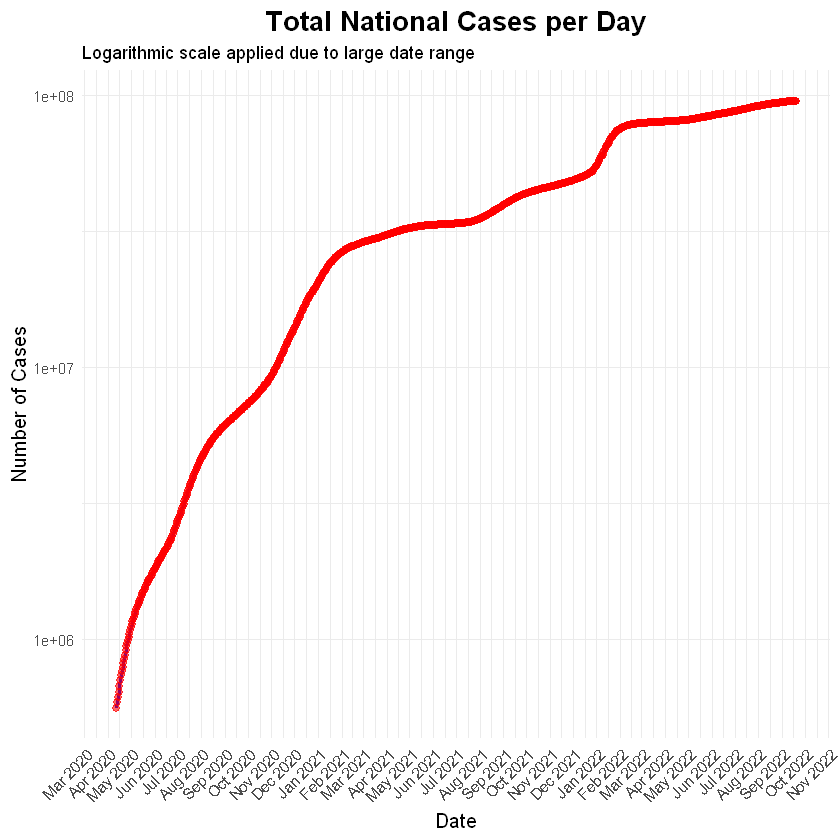

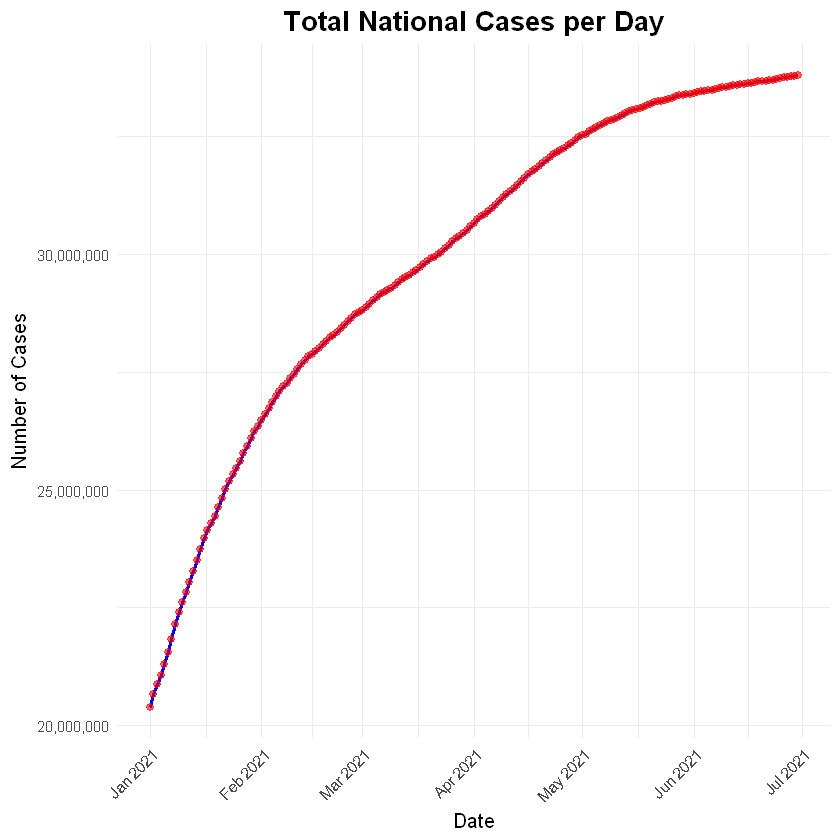

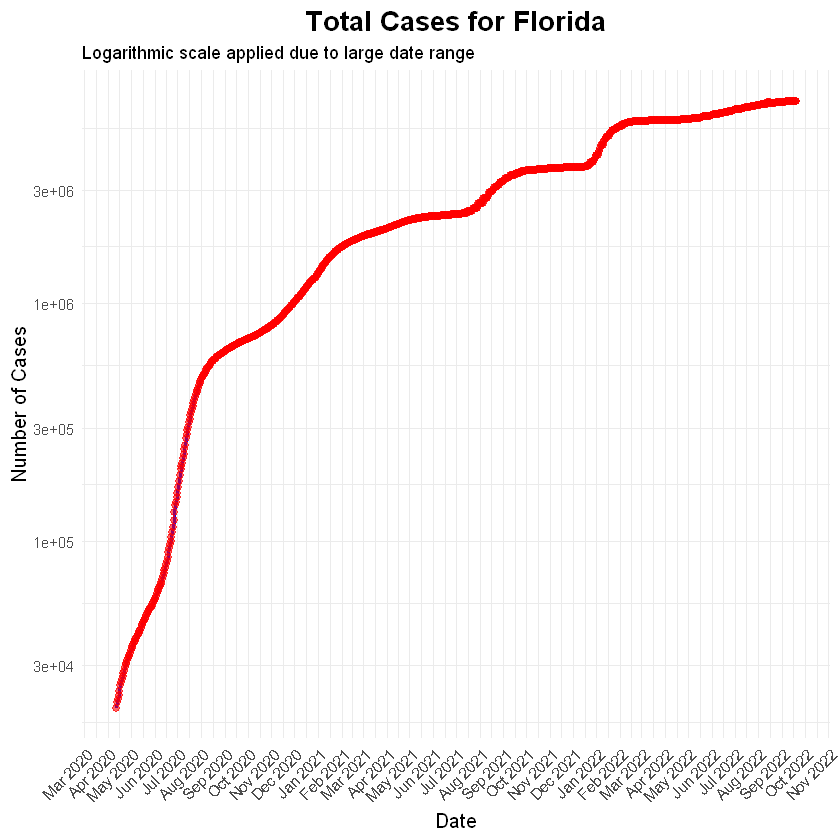

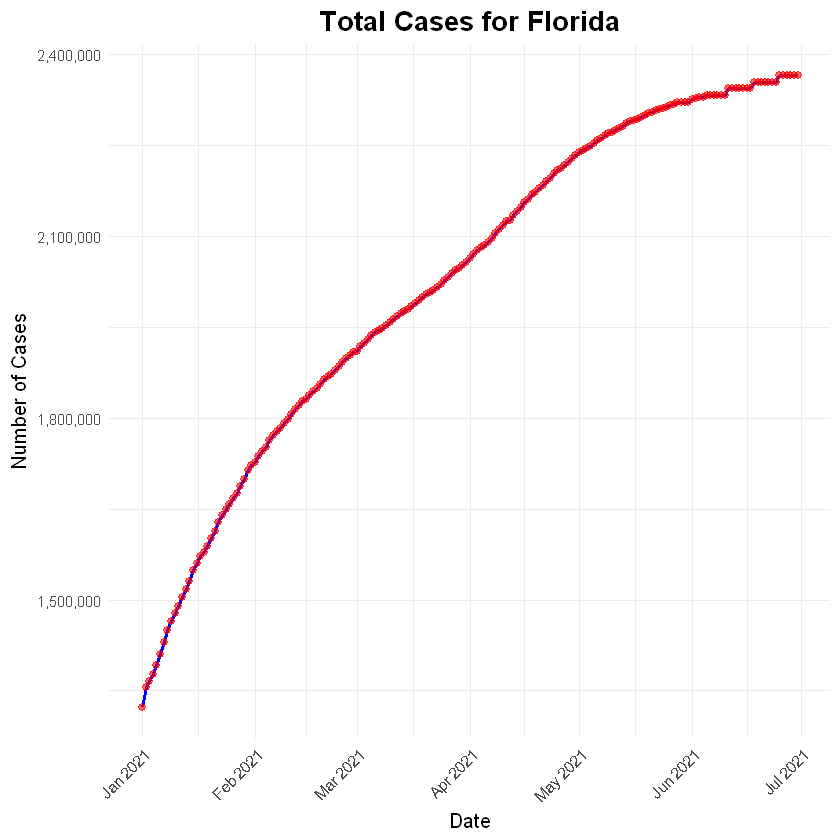

In [8]:
# Function: total_cases_per_day
# Purpose: This function plots the total confirmed COVID-19 cases per day at either the national or state level.
#          If the date range exceeds one year, it defaults to a logarithmic scale for better visualization.
# Parameters:
#   - state (string, optional): Name of the state to filter data for a specific state. If NULL, the function plots national data.
#   - start_date (string in "YYYY-MM-DD" format, optional): Start date for the data range. If NULL, uses the earliest date in the data.
#   - end_date (string in "YYYY-MM-DD" format, optional): End date for the data range. If NULL, uses the latest date in the data.
# Returns:
#   - A ggplot object displaying the confirmed cases over the specified date range, with dynamic scaling.

total_cases_per_day <- function(state = NULL, start_date = NULL, end_date = NULL) {
  
  # Ensure the Date column is in Date format for filtering and plotting
  covid_data <- covid_data %>%
    mutate(Date = as.Date(Date))
  
  # Step 1: Filter data by state if the 'state' parameter is specified
  # If 'state' is NULL, use the entire dataset (i.e., national data)
  if (!is.null(state)) {
    data <- covid_data %>%
      filter(Province_State == state)  # Filter for the specified state
  } else {
    data <- covid_data  # Use national data if no state is specified
  }
  
  # Step 2: Summarize COVID data by date, aggregating confirmed cases
  data <- data %>%
    group_by(Date) %>%
    summarize(Confirmed = sum(Confirmed, na.rm = TRUE)) %>%  # Aggregate confirmed cases
    arrange(Date)  # Sort data by Date
  
  # Step 3: Set start_date and end_date if not provided
  # If 'start_date' or 'end_date' is NULL, default to the earliest and latest dates in the data
  if (is.null(start_date)) {
    start_date <- min(data$Date, na.rm = TRUE)
  } else {
    start_date <- as.Date(start_date)  # Convert to Date format if provided
  }
  
  if (is.null(end_date)) {
    end_date <- max(data$Date, na.rm = TRUE)
  } else {
    end_date <- as.Date(end_date)  # Convert to Date format if provided
  }
  
  # Step 4: Filter the data based on the specified start_date and end_date
  data <- data %>% filter(Date >= start_date & Date <= end_date)
  
  # Step 5: Check the date range to decide on scaling
  # Calculate the difference between start_date and end_date in days
  date_range_days <- as.numeric(difftime(end_date, start_date, units = "days"))
  use_log_scale <- date_range_days > 365  # Use log scale if the range exceeds one year
  
  # Step 6: Create the plot using ggplot2 with conditional scaling
  plot <- ggplot(data, aes(x = Date, y = Confirmed, group = 1)) +
    geom_line(color = "blue", linewidth = 1) +   # Line color and thickness for confirmed cases
    geom_point(color = "red", size = 2, alpha = 0.6) +  # Red points with slight transparency
    labs(
      title = ifelse(is.null(state), "Total National Cases per Day", paste("Total Cases for", state)),  # Dynamic title
      x = "Date",
      y = "Number of Cases"
    ) +
    theme_minimal() +  # Minimal theme for a clean look
    theme(
      plot.title = element_text(hjust = 0.5, size = 16, face = "bold"),  # Centered and styled title
      axis.title.x = element_text(size = 12),
      axis.title.y = element_text(size = 12),
      axis.text.x = element_text(angle = 45, hjust = 1)  # Rotate x-axis labels for readability
    ) +
    scale_x_date(date_breaks = "1 month", date_labels = "%b %Y")  # Format date labels as "Month Year"
  
  # Apply logarithmic scale if the date range is over 1 year and add a subtitle
  if (use_log_scale) {
    plot <- plot + scale_y_log10() + labs(subtitle = "Logarithmic scale applied due to large date range")
  } else {
    # Use regular y-axis scaling with comma-separated labels
    plot <- plot + scale_y_continuous(labels = scales::comma)
  }
  
  # Display the plot
  print(plot)
}

# Example calls:

# 1. National data without date range, defaults to log scale if range is large
total_cases_per_day()

# 2. National data with a shorter date range (e.g., 6 months)
total_cases_per_day(start_date = "2021-01-01", end_date = "2021-06-30")

# 3. State-specific data (e.g., Florida) with default date range
total_cases_per_day(state = "Florida")

# 4. State-specific data (e.g., Florida) with a shorter date range (e.g., 6 months)
total_cases_per_day(state = "Florida", start_date = "2021-01-01", end_date = "2021-06-30")

### **Function 2: `daily_cases_per_day`**

The `daily_cases_per_day` function is designed to plot the daily new COVID-19 cases over a specified date range, with options to filter by state and adjust the date range dynamically. If the date range exceeds one year, the function defaults to a logarithmic scale to better visualize large variations. This function includes:

- **Flexible Input**: Allows the user to specify a state and a date range; if not specified, it defaults to national data and the full date range.
  
- **Automatic Log Scale**: Automatically switches to a log scale if the date range exceeds one year, making it easier to interpret large datasets.

- **Dynamic Plotting**: Creates a clear and informative line plot with points to highlight daily new case counts, using `ggplot2` with a minimalistic theme.


#### Plot Interpretation

- **Blue Line**: The continuous blue line represents the trend of daily new cases over time. This line helps viewers understand how daily cases fluctuate, showing peaks and troughs over the specified period.
  
- **Red Points**: The red points indicate specific data points for each day’s new cases. These points provide detail and help highlight any sharp increases or decreases.

- **Logarithmic Scale (if applied)**: If the date range spans over a year, a logarithmic scale is applied on the y-axis to improve visualization. This scaling is especially helpful when there are extreme values that would otherwise make the graph hard to interpret. A subtitle indicates when the log scale is applied.




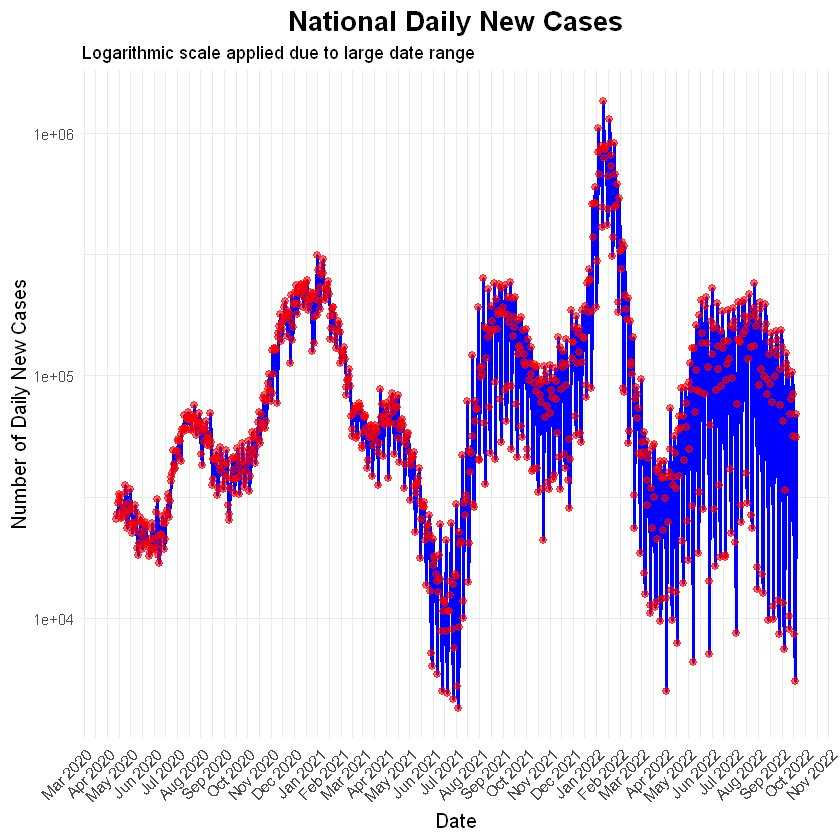

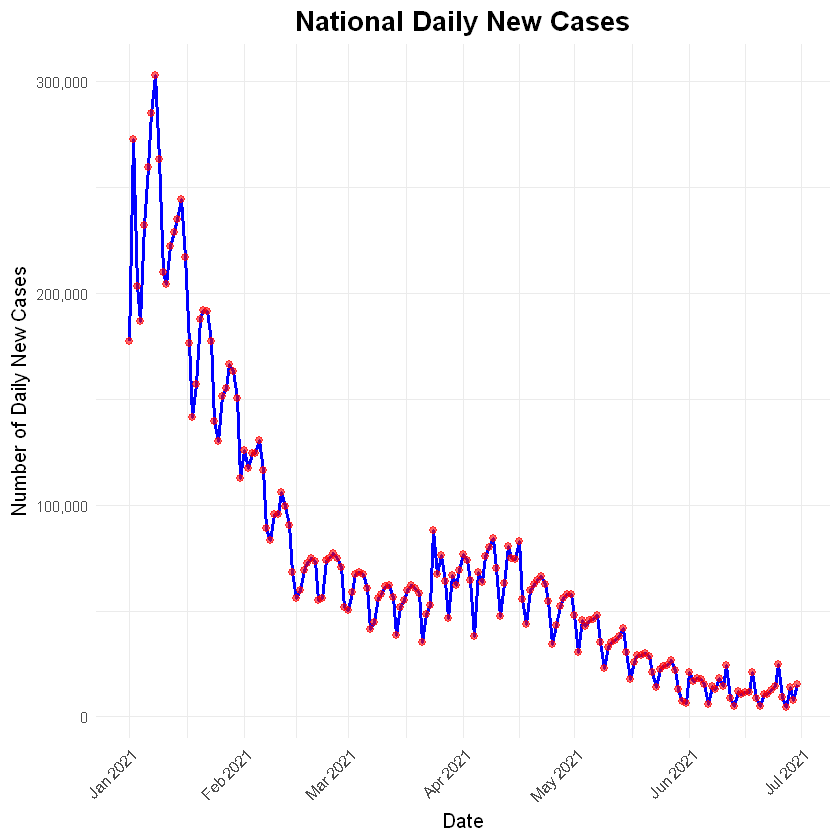

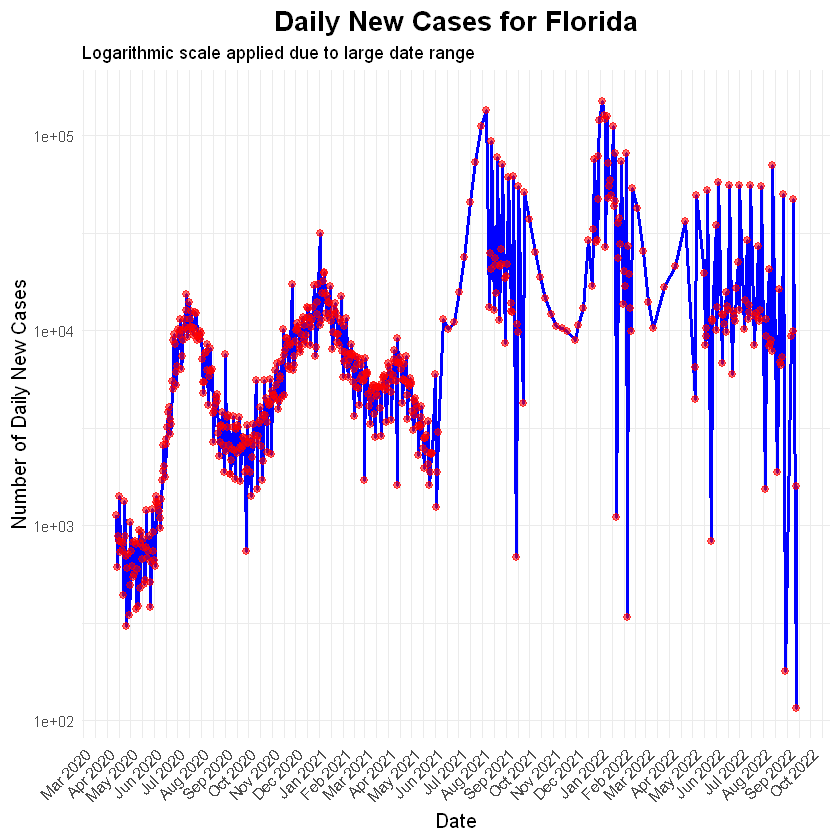

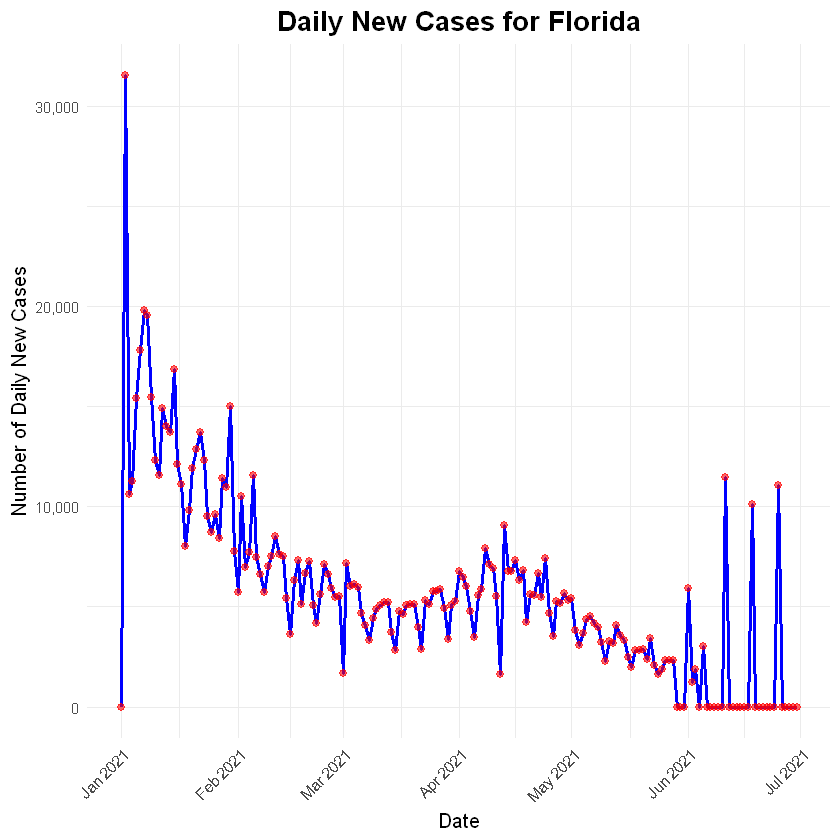

In [9]:
# Function: daily_cases_per_day
# Purpose: This function calculates and plots the daily new COVID-19 cases at either the national or state level.
#          If the date range exceeds one year, it defaults to a logarithmic scale for better visualization.
# Parameters:
#   - state (string, optional): Name of the state to filter data for a specific state. If NULL, the function plots national data.
#   - start_date (string in "YYYY-MM-DD" format, optional): Start date for the data range. If NULL, uses the earliest date in the data.
#   - end_date (string in "YYYY-MM-DD" format, optional): End date for the data range. If NULL, uses the latest date in the data.
# Returns:
#   - A ggplot object displaying the daily new cases over the specified date range, with dynamic scaling.

daily_cases_per_day <- function(state = NULL, start_date = NULL, end_date = NULL) {
  
  # Ensure the Date column is in Date format for filtering and plotting
  covid_data <- covid_data %>%
    mutate(Date = as.Date(Date))
  
  # Step 1: Filter data by state if the 'state' parameter is specified
  if (!is.null(state)) {
    data <- covid_data %>%
      filter(Province_State == state)
  } else {
    data <- covid_data
  }
  
  # Step 2: Summarize COVID data by date, calculating daily new cases
  data <- data %>%
    group_by(Date) %>%
    summarize(Confirmed = sum(Confirmed, na.rm = TRUE)) %>%
    arrange(Date) %>%
    mutate(Daily_Cases = Confirmed - lag(Confirmed, default = first(Confirmed)))
  
  # Step 3: Set start_date and end_date if not provided
  if (is.null(start_date)) {
    start_date <- min(data$Date, na.rm = TRUE)
  } else {
    start_date <- as.Date(start_date)
  }
  
  if (is.null(end_date)) {
    end_date <- max(data$Date, na.rm = TRUE)
  } else {
    end_date <- as.Date(end_date)
  }
  
  # Step 4: Filter the data based on the specified start_date and end_date
  data <- data %>% filter(Date >= start_date & Date <= end_date)
  
  # Step 5: Handle log scale conditionally by removing zero or missing values from Daily_Cases
  date_range_days <- as.numeric(difftime(end_date, start_date, units = "days"))
  use_log_scale <- date_range_days > 365
  
  if (use_log_scale) {
    data <- data %>% filter(Daily_Cases > 0)  # Remove rows with zero or negative Daily_Cases
  }
  
  # Step 6: Create the plot using ggplot2 with conditional scaling
  plot <- ggplot(data, aes(x = Date, y = Daily_Cases, group = 1)) +
    geom_line(color = "blue", linewidth = 1) +
    geom_point(color = "red", size = 2, alpha = 0.6) +
    labs(
      title = ifelse(is.null(state), "National Daily New Cases", paste("Daily New Cases for", state)),
      x = "Date",
      y = "Number of Daily New Cases"
    ) +
    theme_minimal() +
    theme(
      plot.title = element_text(hjust = 0.5, size = 16, face = "bold"),
      axis.title.x = element_text(size = 12),
      axis.title.y = element_text(size = 12),
      axis.text.x = element_text(angle = 45, hjust = 1)
    ) +
    scale_x_date(date_breaks = "1 month", date_labels = "%b %Y")
  
  # Apply logarithmic scale if the date range is over 1 year and add a subtitle
  if (use_log_scale) {
    plot <- plot + scale_y_log10() + labs(subtitle = "Logarithmic scale applied due to large date range")
  } else {
    plot <- plot + scale_y_continuous(labels = scales::comma)
  }
  
  # Display the plot
  print(plot)
}

# Example calls:

# 1. National data without date range; automatically applies log scale if range is large
daily_cases_per_day()

# 2. National data with a specific date range
daily_cases_per_day(start_date = "2021-01-01", end_date = "2021-06-30")

# 3. State-specific data (e.g., Florida) with default date range
daily_cases_per_day(state = "Florida")
# 4. State-specific data (e.g., Florida) with a specific date range
daily_cases_per_day(state = "Florida", start_date = "2021-01-01", end_date = "2021-06-30")



### **Function 3: `total_deaths_per_day`**

The `total_deaths_per_day` function is designed to plot the total cumulative COVID-19 deaths per day, either at the national level or for a specified state. This function provides a dynamic way to visualize the trajectory of COVID-19 deaths, with options to adjust the date range and scaling automatically if the range exceeds a year.

Key features of this function include:

- **Flexible Input**: Allows the user to specify a state and a date range; if no state is specified, it defaults to national data, and if no date range is specified, it uses the full range of available data.
- **Automatic Log Scale**: Automatically applies a logarithmic scale if the date range is over a year, making it easier to visualize data over extended periods.
- **Cumulative Death Counts**: Displays the cumulative number of COVID-19 deaths over time, rather than daily increments, to show the total impact.
- **Dynamic Plotting**: Uses `ggplot2` to create a clear and informative line plot with points to highlight data on each day, enhancing readability.

This function is useful for analyzing trends in COVID-19 death rates over time, adapting to user inputs for a tailored analytical view.


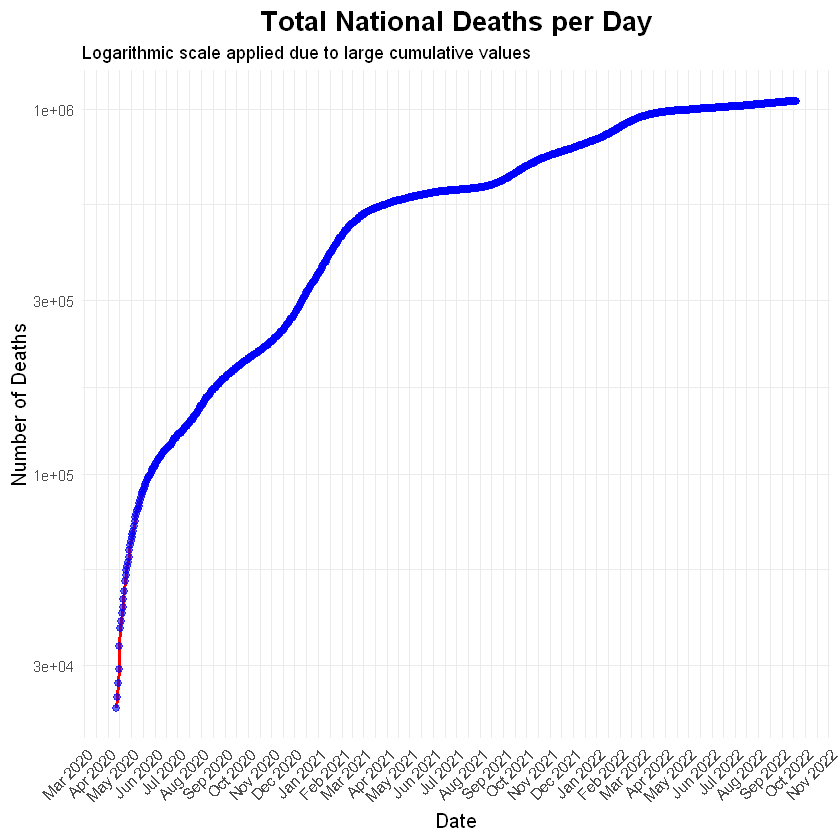

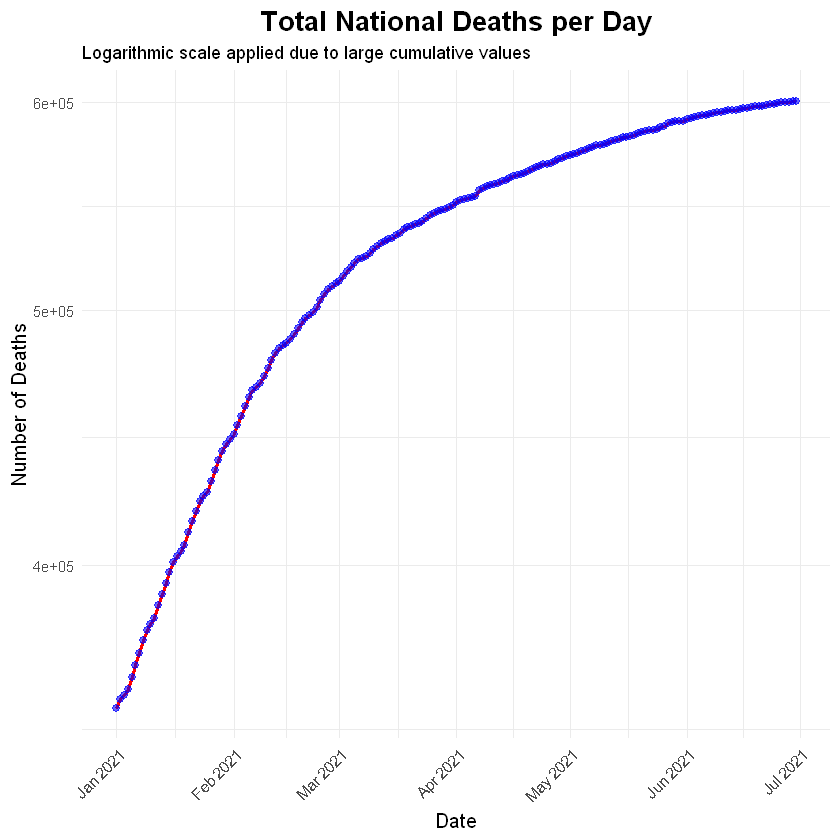

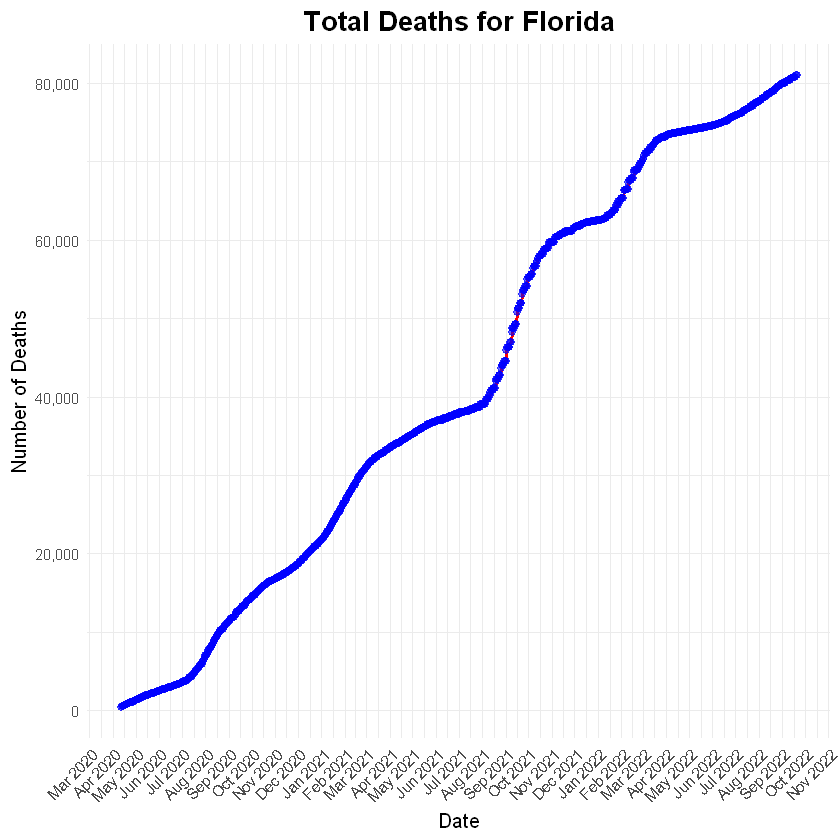

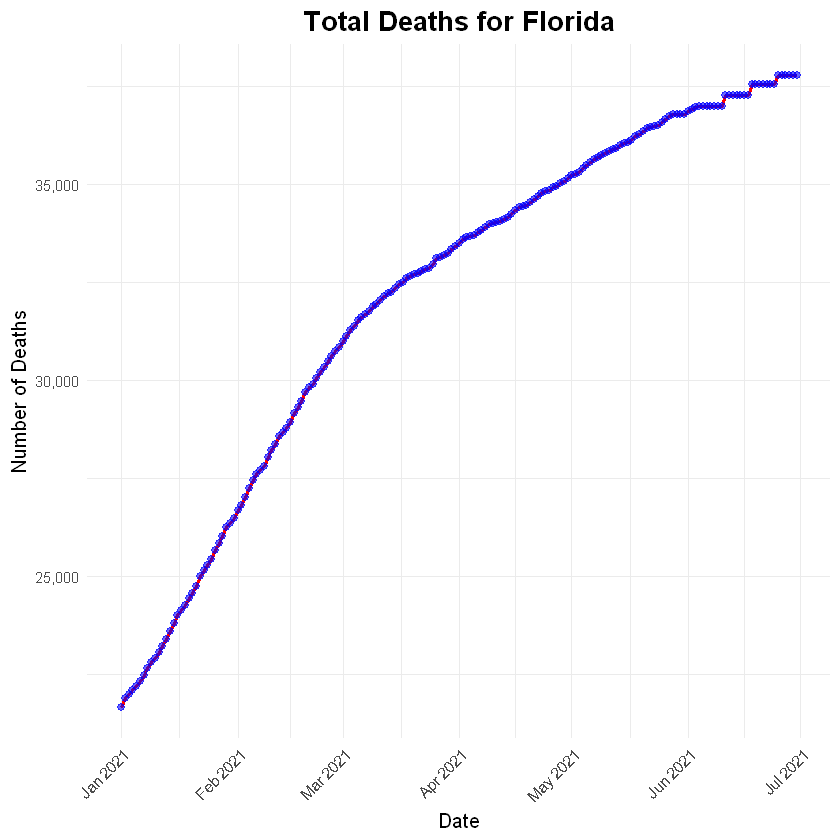

In [10]:
# Function: total_deaths_per_day
# Purpose: This function plots the total cumulative COVID-19 deaths per day at either the national or state level.
#          If the cumulative deaths exceed a certain threshold, it defaults to a logarithmic scale for better visualization.
# Parameters:
#   - state (string, optional): Name of the state to filter data for a specific state. If NULL, the function plots national data.
#   - start_date (string in "YYYY-MM-DD" format, optional): Start date for the data range. If NULL, uses the earliest date in the data.
#   - end_date (string in "YYYY-MM-DD" format, optional): End date for the data range. If NULL, uses the latest date in the data.
# Returns:
#   - A ggplot object displaying the cumulative deaths over the specified date range, with dynamic scaling.

total_deaths_per_day <- function(state = NULL, start_date = NULL, end_date = NULL) {
  
  # Ensure the Date column is in Date format for filtering and plotting
  covid_data <- covid_data %>%
    mutate(Date = as.Date(Date))
  
  # Step 1: Filter data by state if the 'state' parameter is specified
  # If 'state' is NULL, use the entire dataset (i.e., national data)
  if (!is.null(state)) {
    data <- covid_data %>%
      filter(Province_State == state)  # Filter for the specified state
  } else {
    data <- covid_data  # Use national data if no state is specified
  }
  
  # Step 2: Summarize COVID data by date, aggregating deaths
  data <- data %>%
    group_by(Date) %>%
    summarize(Deaths = sum(Deaths, na.rm = TRUE)) %>%  # Aggregate cumulative deaths
    arrange(Date)  # Sort data by Date
  
  # Step 3: Set start_date and end_date if not provided
  if (is.null(start_date)) {
    start_date <- min(data$Date, na.rm = TRUE)
  } else {
    start_date <- as.Date(start_date)
  }
  
  if (is.null(end_date)) {
    end_date <- max(data$Date, na.rm = TRUE)
  } else {
    end_date <- as.Date(end_date)
  }
  
  # Step 4: Filter the data based on the specified start_date and end_date
  data <- data %>% filter(Date >= start_date & Date <= end_date)
  
  # Step 5: Determine if log scale is needed based on max deaths in the selected date range
  max_deaths <- max(data$Deaths, na.rm = TRUE)
  use_log_scale <- max_deaths > 1e5  # Use log scale if cumulative deaths exceed 100,000
  
  # Step 6: Create the plot using ggplot2 with conditional scaling
  plot <- ggplot(data, aes(x = Date, y = Deaths, group = 1)) +
    geom_line(color = "red", linewidth = 1) +   # Line color and thickness for deaths
    geom_point(color = "blue", size = 2, alpha = 0.6) +  # Blue points with slight transparency
    labs(
      title = ifelse(is.null(state), "Total National Deaths per Day", paste("Total Deaths for", state)),  # Dynamic title
      x = "Date",
      y = "Number of Deaths"
    ) +
    theme_minimal() +
    theme(
      plot.title = element_text(hjust = 0.5, size = 16, face = "bold"),  # Centered and styled title
      axis.title.x = element_text(size = 12),
      axis.title.y = element_text(size = 12),
      axis.text.x = element_text(angle = 45, hjust = 1)  # Rotate x-axis labels for readability
    ) +
    scale_x_date(date_breaks = "1 month", date_labels = "%b %Y")  # Format date labels as "Month Year"
  
  # Apply logarithmic scale if the cumulative deaths exceed the threshold
  if (use_log_scale) {
    plot <- plot + scale_y_log10() + labs(subtitle = "Logarithmic scale applied due to large cumulative values")
  } else {
    plot <- plot + scale_y_continuous(labels = scales::comma)
  }
  
  # Display the plot
  print(plot)
}

# Example calls:

# 1. National data without date range, defaults to log scale if cumulative deaths are high
total_deaths_per_day()

# 2. National data with a shorter date range (e.g., 6 months)
total_deaths_per_day(start_date = "2021-01-01", end_date = "2021-06-30")

# 3. State-specific data (e.g., Florida) with default date range
total_deaths_per_day(state = "Florida")

# 4. State-specific data (e.g., Florida) with a shorter date range (e.g., 6 months)
total_deaths_per_day(state = "Florida", start_date = "2021-01-01", end_date = "2021-06-30")



### **Function 4: `daily_deaths_per_day`**

The `daily_deaths_per_day` function is designed to plot the daily new COVID-19 deaths over a specified date range, with options to filter by state and adjust the date range dynamically. If the date range exceeds one year, the function defaults to a logarithmic scale to better visualize large variations. This function includes:

- **Flexible Input**: Allows the user to specify a state and a date range; if not specified, it defaults to national data and the full date range.
  
- **Automatic Log Scale**: Automatically switches to a log scale if the date range exceeds one year, making it easier to interpret large datasets.

- **Dynamic Plotting**: Creates a clear and informative line plot with points to highlight daily new death counts, using `ggplot2` with a minimalistic theme.

#### Plot Interpretation

- **Blue Line**: The continuous blue line represents the trend of daily new deaths over time, showing the fluctuations in COVID-19-related deaths.
  
- **Red Points**: The red points indicate specific data points for each day’s new deaths, adding detail and emphasizing changes in the daily death count.

- **Logarithmic Scale (if applied)**: If the date range spans over a year, a logarithmic scale is applied on the y-axis to improve visualization. This scaling is especially helpful when there are extreme values that would otherwise make the graph hard to interpret. A subtitle indicates when the log scale is applied.


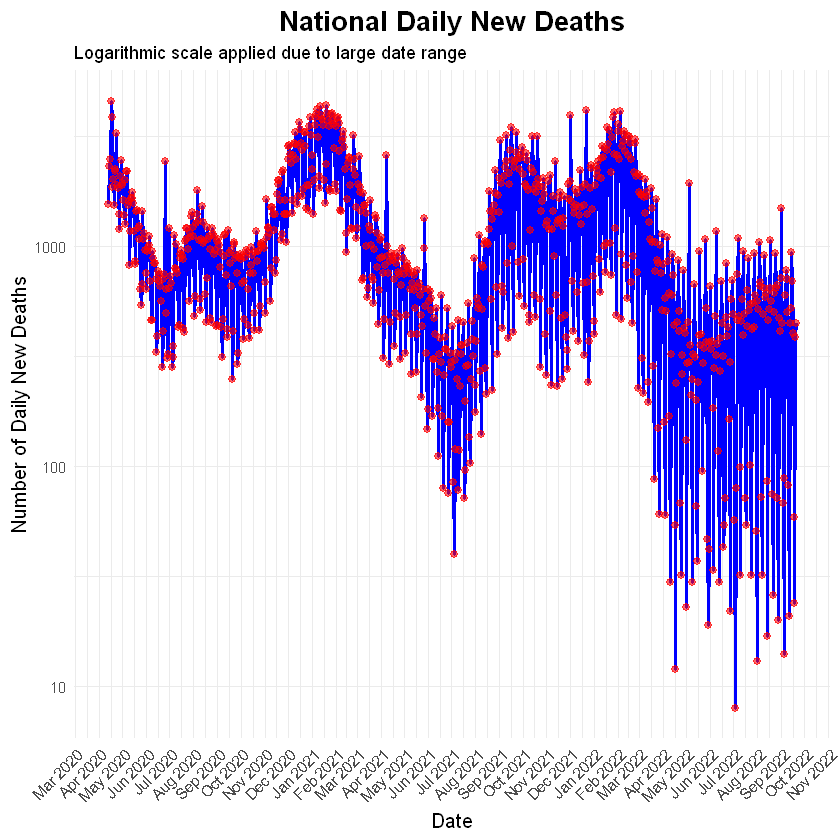

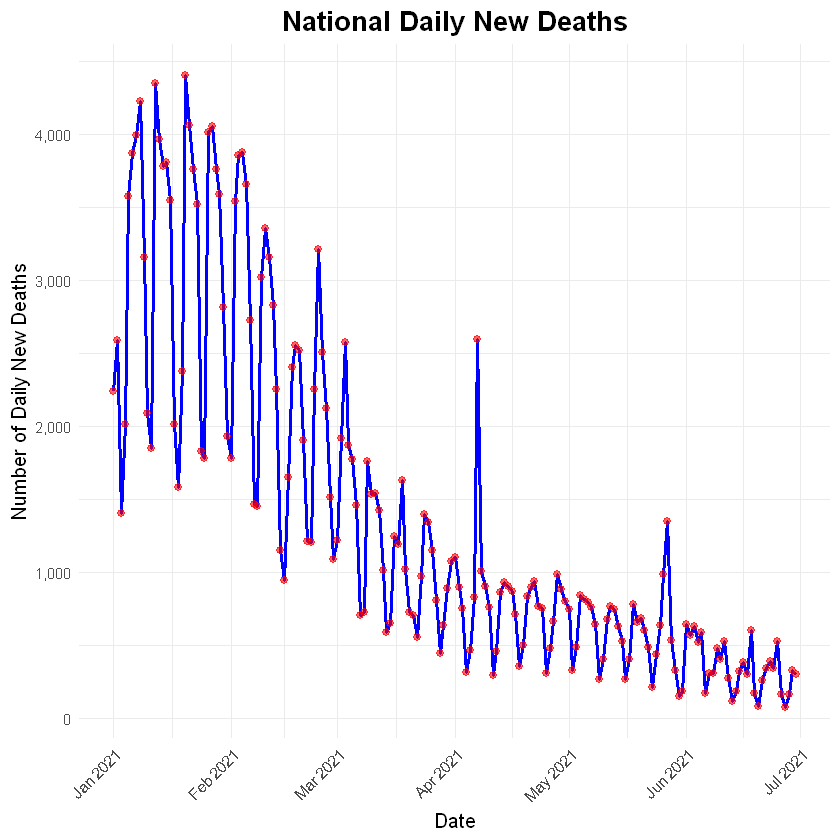

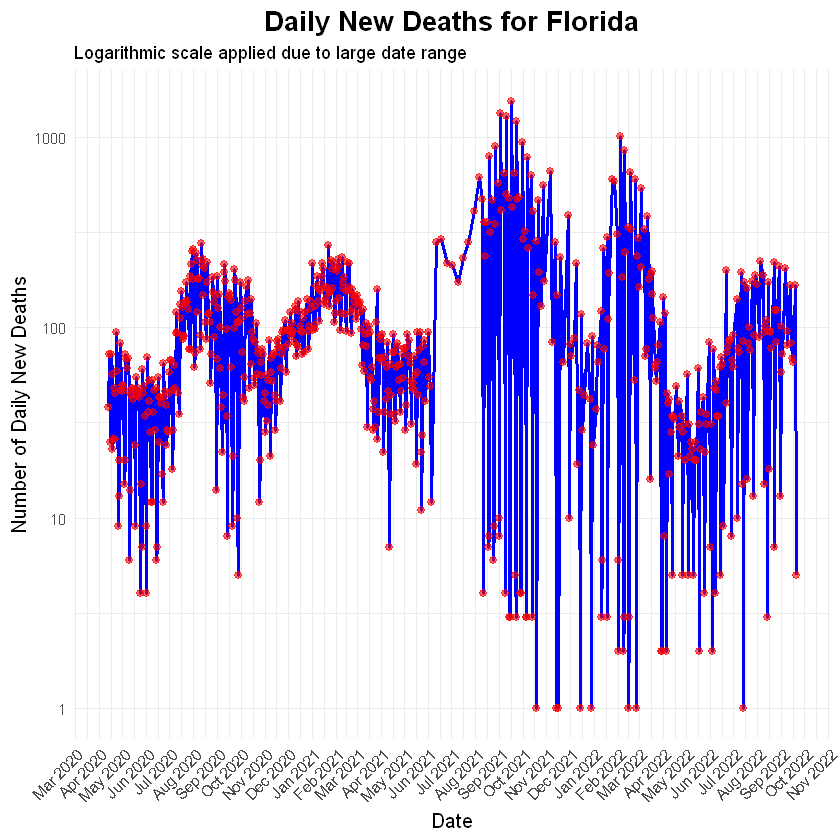

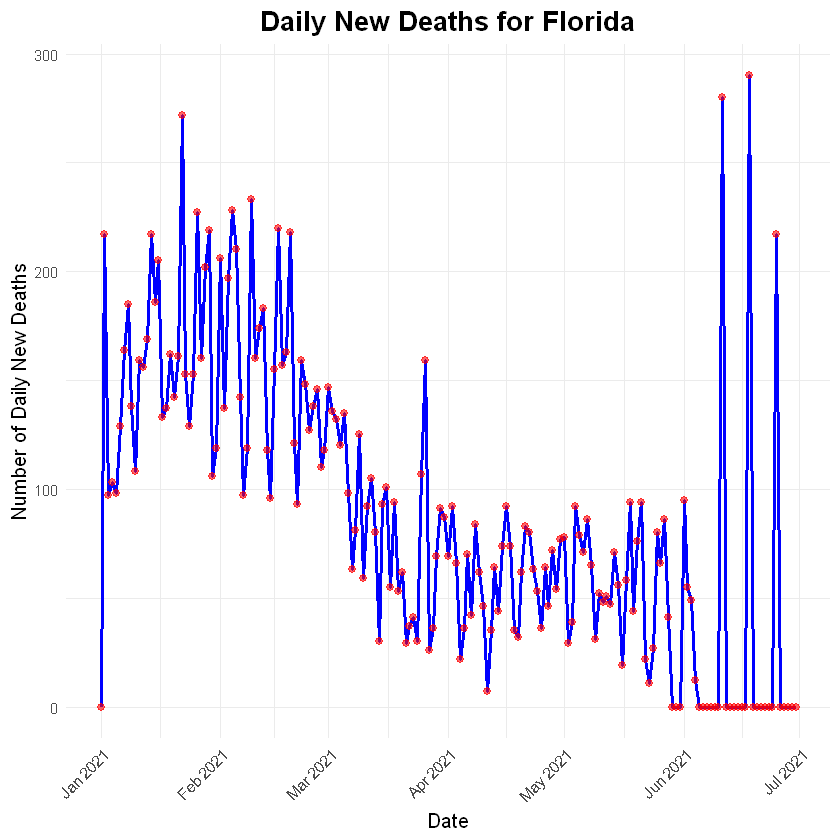

In [11]:
# Function: daily_deaths_per_day
# Purpose: This function calculates and plots the daily new COVID-19 deaths at either the national or state level.
#          If the date range exceeds one year, it defaults to a logarithmic scale for better visualization.
# Parameters:
#   - state (string, optional): Name of the state to filter data for a specific state. If NULL, the function plots national data.
#   - start_date (string in "YYYY-MM-DD" format, optional): Start date for the data range. If NULL, uses the earliest date in the data.
#   - end_date (string in "YYYY-MM-DD" format, optional): End date for the data range. If NULL, uses the latest date in the data.
# Returns:
#   - A ggplot object displaying the daily new deaths over the specified date range, with dynamic scaling.

daily_deaths_per_day <- function(state = NULL, start_date = NULL, end_date = NULL) {
  
  # Ensure the Date column is in Date format for filtering and plotting
  covid_data <- covid_data %>% 
    mutate(Date = as.Date(Date))
  
  # Step 1: Filter data by state if the 'state' parameter is specified
  if (!is.null(state)) {
    data <- covid_data %>% 
      filter(Province_State == state)
  } else {
    data <- covid_data
  }
  
  # Step 2: Summarize COVID data by date, calculating daily new deaths
  data <- data %>%
    group_by(Date) %>%
    summarize(Deaths = sum(Deaths, na.rm = TRUE)) %>%
    arrange(Date) %>%
    mutate(Daily_Deaths = Deaths - lag(Deaths, default = first(Deaths)))
  
  # Step 3: Set start_date and end_date if not provided
  if (is.null(start_date)) {
    start_date <- min(data$Date, na.rm = TRUE)
  } else {
    start_date <- as.Date(start_date)
  }
  
  if (is.null(end_date)) {
    end_date <- max(data$Date, na.rm = TRUE)
  } else {
    end_date <- as.Date(end_date)
  }
  
  # Step 4: Filter the data based on the specified start_date and end_date
  data <- data %>% filter(Date >= start_date & Date <= end_date)
  
  # Step 5: Handle log scale conditionally by removing zero or missing values from Daily_Deaths
  date_range_days <- as.numeric(difftime(end_date, start_date, units = "days"))
  use_log_scale <- date_range_days > 365
  
  if (use_log_scale) {
    data <- data %>% filter(Daily_Deaths > 0)
  }
  
  # Step 6: Create the plot using ggplot2 with conditional scaling
  plot <- ggplot(data, aes(x = Date, y = Daily_Deaths, group = 1)) +
    geom_line(color = "blue", linewidth = 1) +
    geom_point(color = "red", size = 2, alpha = 0.6) +
    labs(
      title = ifelse(is.null(state), "National Daily New Deaths", paste("Daily New Deaths for", state)),
      x = "Date",
      y = "Number of Daily New Deaths"
    ) +
    theme_minimal() +
    theme(
      plot.title = element_text(hjust = 0.5, size = 16, face = "bold"),
      axis.title.x = element_text(size = 12),
      axis.title.y = element_text(size = 12),
      axis.text.x = element_text(angle = 45, hjust = 1)
    ) +
    scale_x_date(date_breaks = "1 month", date_labels = "%b %Y")
  
  # Apply logarithmic scale if the date range is over 1 year and add a subtitle
  if (use_log_scale) {
    plot <- plot + scale_y_log10() + labs(subtitle = "Logarithmic scale applied due to large date range")
  } else {
    plot <- plot + scale_y_continuous(labels = scales::comma)
  }
  
  # Display the plot
  print(plot)
}

# Example calls:

# 1. National data without date range; automatically applies log scale if range is large
daily_deaths_per_day()

# 2. National data with a specific date range
daily_deaths_per_day(start_date = "2021-01-01", end_date = "2021-06-30")

# 3. State-specific data (e.g., Florida) with default date range
daily_deaths_per_day(state = "Florida")

# 4. State-specific data (e.g., Florida) with a specific date range
daily_deaths_per_day(state = "Florida", start_date = "2021-01-01", end_date = "2021-06-30")


### **Function 5: `mortality_rate_per_day`**

The `mortality_rate_per_day` function is designed to analyze and plot the COVID-19 daily mortality rate over a specified date range, with options to filter by state and adjust the date range dynamically. If the date range exceeds one year, the function defaults to a logarithmic scale for better visualization of significant variations over time. This function includes:

- **Flexible Input**: Allows the user to specify a state and a date range; if not specified, it defaults to national data and the full date range.
  
- **Automatic Log Scale**: Automatically switches to a log scale if the date range exceeds one year, enhancing the interpretation of large datasets with substantial variability.

- **Dynamic Plotting**: Creates a clear and informative line plot with points to highlight daily mortality rate values, using `ggplot2` with a minimalistic theme.

**Plot Interpretation**

- **Purple Line**: The continuous purple line represents the trend of mortality rates over time. This line provides insight into fluctuations in the death rate, potentially correlating with healthcare system strain, variant severity, or vaccination rates.
  
- **Orange Points**: The orange points indicate specific data points for each day’s mortality rate, offering a detailed view of daily changes.

- **Logarithmic Scale (if applied)**: If the date range spans over a year, a logarithmic scale is applied on the y-axis to improve visualization. This scaling is especially useful when mortality rate values vary widely across time. A subtitle indicates when the log scale is applied.

This function offers valuable insights into the impact of COVID-19 over time, highlighting critical phases where mortality was particularly high, which may correlate with surges in cases, variant emergence, or healthcare challenges.



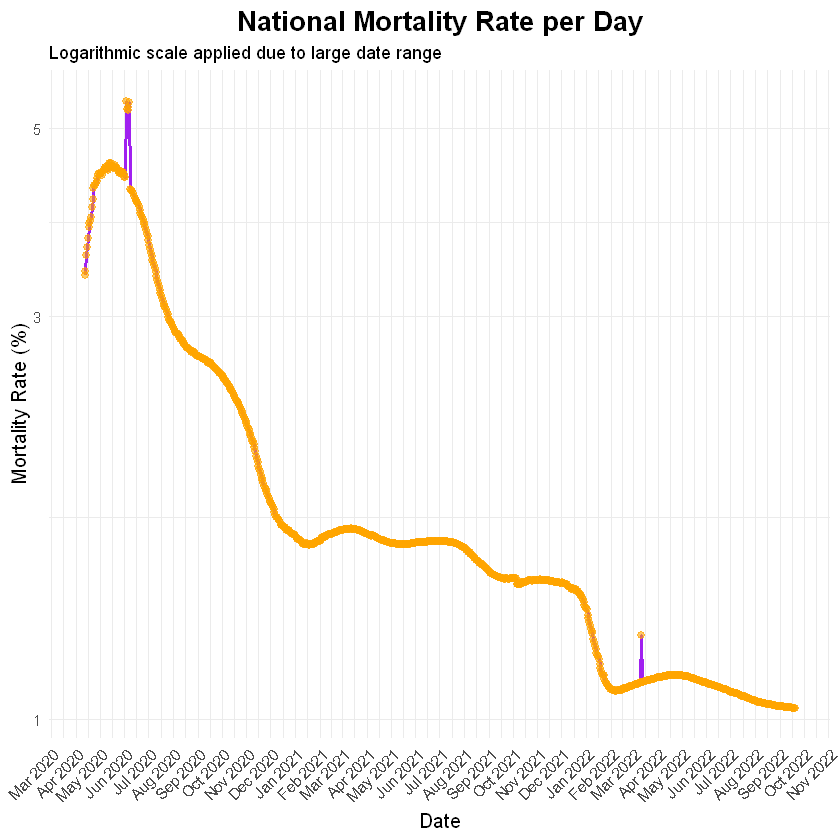

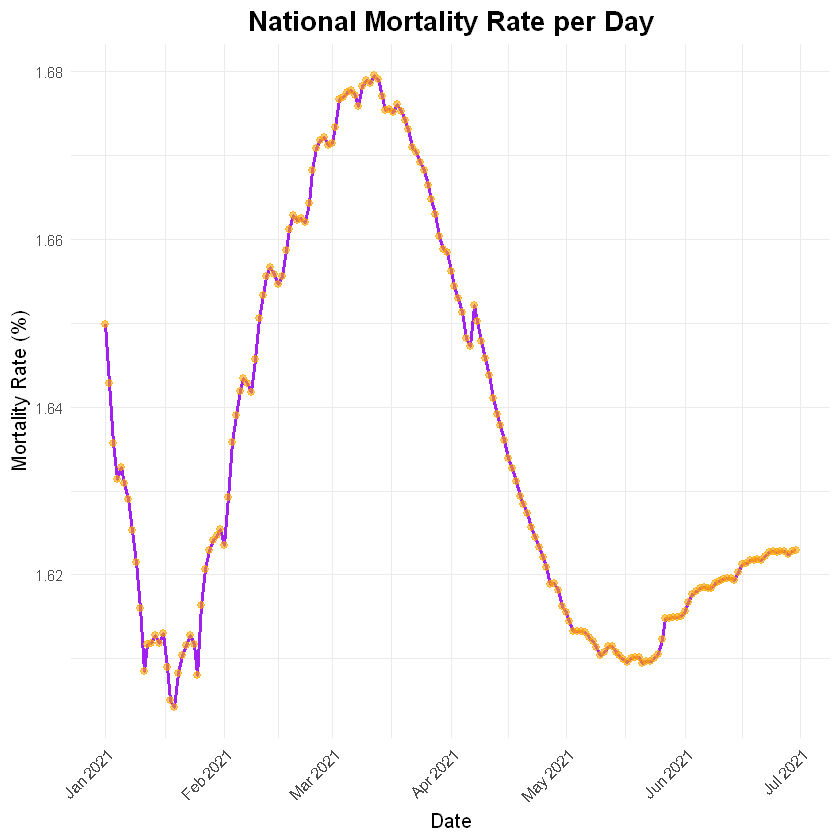

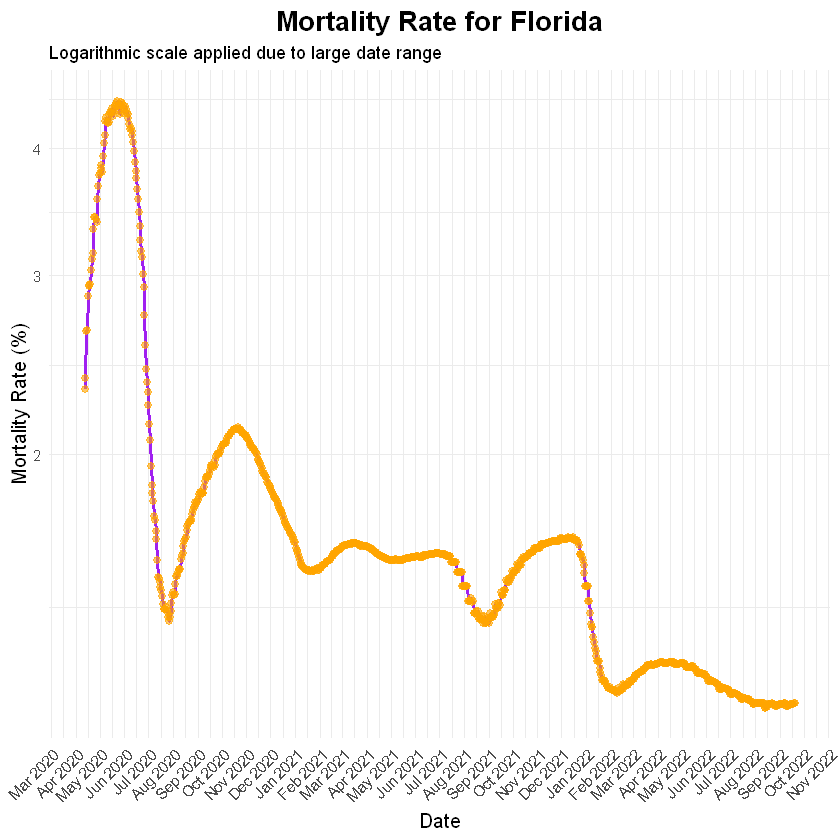

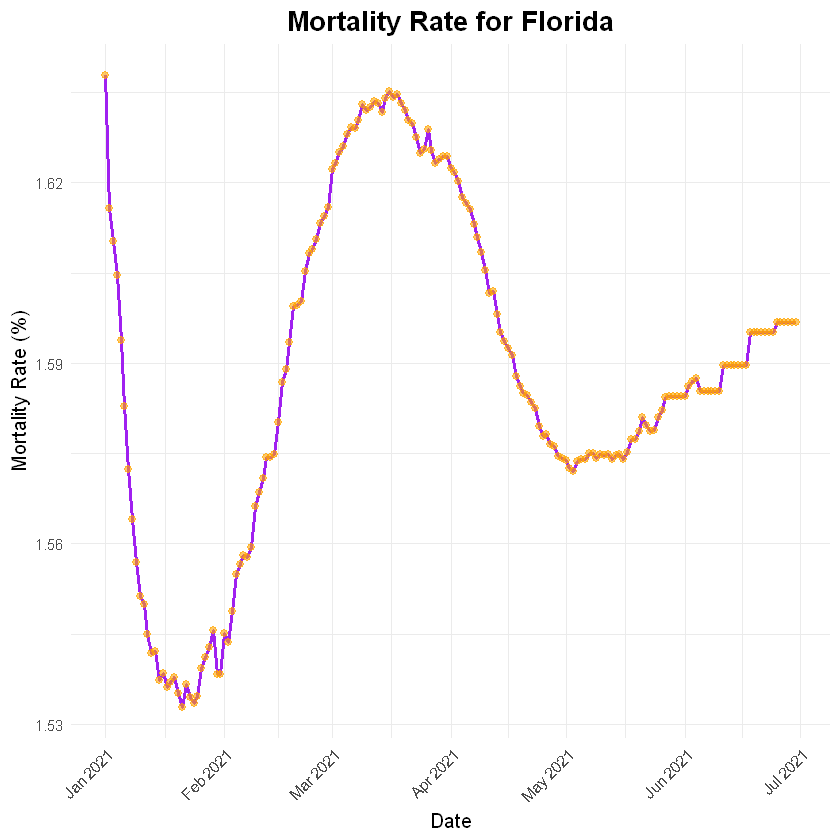

In [12]:
# Function: mortality_rate_per_day
# Purpose: This function plots the daily COVID-19 mortality rate (Death_Rate column) 
#          at either the national or state level. If the date range exceeds one year, 
#          it defaults to a logarithmic scale for better visualization.
# Parameters:
#   - state (string, optional): Name of the state to filter data for a specific state. If NULL, the function plots national data.
#   - start_date (string in "YYYY-MM-DD" format, optional): Start date for the data range. If NULL, uses the earliest date in the data.
#   - end_date (string in "YYYY-MM-DD" format, optional): End date for the data range. If NULL, uses the latest date in the data.
# Returns:
#   - A ggplot object displaying the mortality rate over the specified date range, with dynamic scaling.

mortality_rate_per_day <- function(state = NULL, start_date = NULL, end_date = NULL) {
  
  # Ensure the Date column is in Date format for filtering and plotting
  covid_data <- covid_data %>%
    mutate(Date = as.Date(Date))
  
  # Step 1: Filter data by state if the 'state' parameter is specified
  if (!is.null(state)) {
    data <- covid_data %>%
      filter(Province_State == state)
  } else {
    data <- covid_data
  }
  
  # Step 2: Summarize COVID data by date, selecting only necessary columns (Date and Death_Rate)
  data <- data %>%
    group_by(Date) %>%
    summarize(Death_Rate = mean(Death_Rate, na.rm = TRUE)) %>%  # Use pre-calculated Death_Rate column
    arrange(Date)
  
  # Step 3: Set start_date and end_date if not provided
  if (is.null(start_date)) {
    start_date <- min(data$Date, na.rm = TRUE)
  } else {
    start_date <- as.Date(start_date)
  }
  
  if (is.null(end_date)) {
    end_date <- max(data$Date, na.rm = TRUE)
  } else {
    end_date <- as.Date(end_date)
  }
  
  # Step 4: Filter the data based on the specified start_date and end_date
  data <- data %>% filter(Date >= start_date & Date <= end_date)
  
  # Step 5: Handle log scale conditionally by removing zero or missing values from Death_Rate
  date_range_days <- as.numeric(difftime(end_date, start_date, units = "days"))
  use_log_scale <- date_range_days > 365
  
  if (use_log_scale) {
    data <- data %>% filter(Death_Rate > 0)  # Remove rows with zero or negative Death_Rate
  }
  
  # Step 6: Create the plot using ggplot2 with conditional scaling
  plot <- ggplot(data, aes(x = Date, y = Death_Rate, group = 1)) +
    geom_line(color = "purple", linewidth = 1) +
    geom_point(color = "orange", size = 2, alpha = 0.6) +
    labs(
      title = ifelse(is.null(state), "National Mortality Rate per Day", paste("Mortality Rate for", state)),
      x = "Date",
      y = "Mortality Rate (%)"
    ) +
    theme_minimal() +
    theme(
      plot.title = element_text(hjust = 0.5, size = 16, face = "bold"),
      axis.title.x = element_text(size = 12),
      axis.title.y = element_text(size = 12),
      axis.text.x = element_text(angle = 45, hjust = 1)
    ) +
    scale_x_date(date_breaks = "1 month", date_labels = "%b %Y")
  
  # Apply logarithmic scale if the date range is over 1 year and add a subtitle
  if (use_log_scale) {
    plot <- plot + scale_y_log10() + labs(subtitle = "Logarithmic scale applied due to large date range")
  } else {
    plot <- plot + scale_y_continuous(labels = scales::comma)
  }
  
  # Display the plot
  print(plot)
}

# Example calls:

# 1. National data without date range; automatically applies log scale if range is large
mortality_rate_per_day()

# 2. National data with a specific date range
mortality_rate_per_day(start_date = "2021-01-01", end_date = "2021-06-30")

# 3. State-specific data (e.g., Florida) with default date range
mortality_rate_per_day(state = "Florida")

# 4. State-specific data (e.g., Florida) with a specific date range
mortality_rate_per_day(state = "Florida", start_date = "2021-01-01", end_date = "2021-06-30")



---
## **Section 5: Creating a Shiny Dashboard**

In this section, we are building an interactive Shiny dashboard to visualize COVID-19 data trends based on user inputs. The dashboard will allow users to select a specific state, set a date range, and choose from various analysis types to dynamically generate plots. This interactive setup enables users to explore data on total cases, daily cases, total deaths, daily deaths, and mortality rate for different time frames and regions.

### **Key Features of the Dashboard**
- **State Selection**: Users can pick a state from a dropdown list, dynamically populated from the dataset.
- **Date Range Input**: Users specify start and end dates to filter the data within a desired time frame.
- **Analysis Type Selection**: A dropdown menu lets users select the type of analysis they want to see (e.g., Total Cases, Daily Cases).
- **Dynamic Plot Rendering**: Based on the selected options, the dashboard will render the appropriate plot in real-time using the pre-defined functions.

This dashboard is built using the `shiny` package in R and takes advantage of `ggplot2` for visualization. It will run locally, allowing users to view and interact with it in their web browser.

### **Instructions to Run the Dashboard**

1. **Libraries Required**:
   - Install the necessary libraries if not already installed:
     - `shiny` for creating the interactive web application.
     - `ggplot2` for generating plots and visualizations.

2. **Steps to Run the Dashboard**:
   - Load the required libraries and run the code in an R environment that supports Shiny applications (e.g., RStudio).
   - After running the code, a link will appear in the console. Click the link to open the dashboard in your web browser.

3. **User Interface (UI)**:
   - The UI consists of a sidebar with input options and a main panel for displaying plots.
   - The sidebar allows users to select:
     - **State**: Dropdown with state names from the dataset.
     - **Start Date** and **End Date**: Date input fields to specify the date range.
     - **Analysis Type**: Dropdown to select the type of analysis (e.g., Total Cases, Daily Deaths).
   
4. **Server Logic**:
   - The server function interprets the user inputs and renders the appropriate plot using the chosen analysis type. 
   - It uses the functions defined previously (e.g., `total_cases_per_day`, `daily_cases_per_day`) to generate and display data visualizations based on the selected parameters.

5. **Viewing the Output**:
   - After running the code, click on the generated link in the R console to open the dashboard in your web browser.
   - The dashboard will be fully interactive, with plots that adjust according to user inputs in real time.

In [ ]:
# Saving Cleaned File For Back_up
# Define the file path where you want to save the CSV file
file_path <- "C:/Users/Krish Patel/Desktop/project 3/covid_data_new.csv"

# Save the covid_data dataframe as a CSV file
write.csv(covid_data, file = file_path, row.names = FALSE)

# Print confirmation message
cat("covid_data has been saved to", file_path)

ERROR: Error in eval(expr, p): object 'covid_data' not found


In [ ]:
library(shiny)
library(ggplot2)

# Define UI (User Interface) for the dashboard
ui <- fluidPage(
  # Set the title of the dashboard
  titlePanel("COVID-19 Data Analysis Dashboard"),
  
  # Define the sidebar and main panel layout
  sidebarLayout(
    # Sidebar for user inputs (state selection, date range, analysis type)
    sidebarPanel(
      # Dropdown to select a specific state from the covid_data dataset
      selectInput("state", "Select State:", choices = unique(covid_data$Province_State)),
      
      # Date input fields for start and end dates of the analysis period
      dateInput("start_date", "Start Date:", value = "2020-01-01"),
      dateInput("end_date", "End Date:", value = "2022-01-01"),
      
      # Dropdown to choose the type of analysis (e.g., Total Cases, Daily Cases)
      selectInput("analysis_type", "Select Analysis:", choices = c("Total Cases", "Daily Cases", "Total Deaths", "Daily Deaths", "Mortality Rate"))
    ),
    
    # Main panel for displaying the output plot based on user selections
    mainPanel(
      # Display the plot generated in the server logic
      plotOutput("plot")
    )
  )
)

# Define server logic (processing of user inputs and rendering the appropriate plot)
server <- function(input, output) {
  # Render the plot based on the analysis type chosen by the user
  output$plot <- renderPlot({
    # Conditionally render plots based on user-selected analysis type
    if (input$analysis_type == "Total Cases") {
      # Call the total_cases_per_day function with user-selected parameters
      total_cases_per_day(state = input$state, start_date = input$start_date, end_date = input$end_date)
    } else if (input$analysis_type == "Daily Cases") {
      # Call the daily_cases_per_day function with user-selected parameters
      daily_cases_per_day(state = input$state, start_date = input$start_date, end_date = input$end_date)
    } else if (input$analysis_type == "Total Deaths") {
      # Call the total_deaths_per_day function with user-selected parameters
      total_deaths_per_day(state = input$state, start_date = input$start_date, end_date = input$end_date)
    } else if (input$analysis_type == "Daily Deaths") {
      # Call the daily_deaths_per_day function with user-selected parameters
      daily_deaths_per_day(state = input$state, start_date = input$start_date, end_date = input$end_date)
    } else if (input$analysis_type == "Mortality Rate") {
      # Call the mortality_rate_per_day function with user-selected parameters
      mortality_rate_per_day(state = input$state, start_date = input$start_date, end_date = input$end_date)
    }
  })
}

# Run the application
shinyApp(ui = ui, server = server)




Listening on http://127.0.0.1:5945



### **COVID-19 Data Analysis Dashboard Overview**
This Shiny dashboard allows users to select a state, specify a date range, and choose an analysis type to visualize COVID-19 data trends dynamically.


![Dashboard Overview](<attachment:SS 1 - Overview.png>)

##### 1. State Selection
The dropdown menu provides a list of states from which users can select a specific state for analysis.

 ![State Selection](<attachment:SS 2 - State.png>)

#### 2. Date Range Selection
The **Date Range** section allows users to define a specific time period for analysis. Users can enter a **Start Date** and **End Date** to narrow down the date range for the selected state and analysis type. This feature is helpful for focusing on particular periods, such as early pandemic stages or more recent trends.
- **Date Format**: Enter dates in `YYYY-MM-DD` format (e.g., `2021-01-01`). 
- If no dates are specified, the dashboard defaults to the entire available date range.

![Date Selection](<attachment:SS 3 - Date.png>)

##### 3. Analysis Type
The analysis type dropdown lets users choose the type of visualization, such as total cases, daily cases, total deaths, daily deaths, or mortality rate.

![Analysis Type Selection](<attachment:SS 4 - Analysis type.png>)
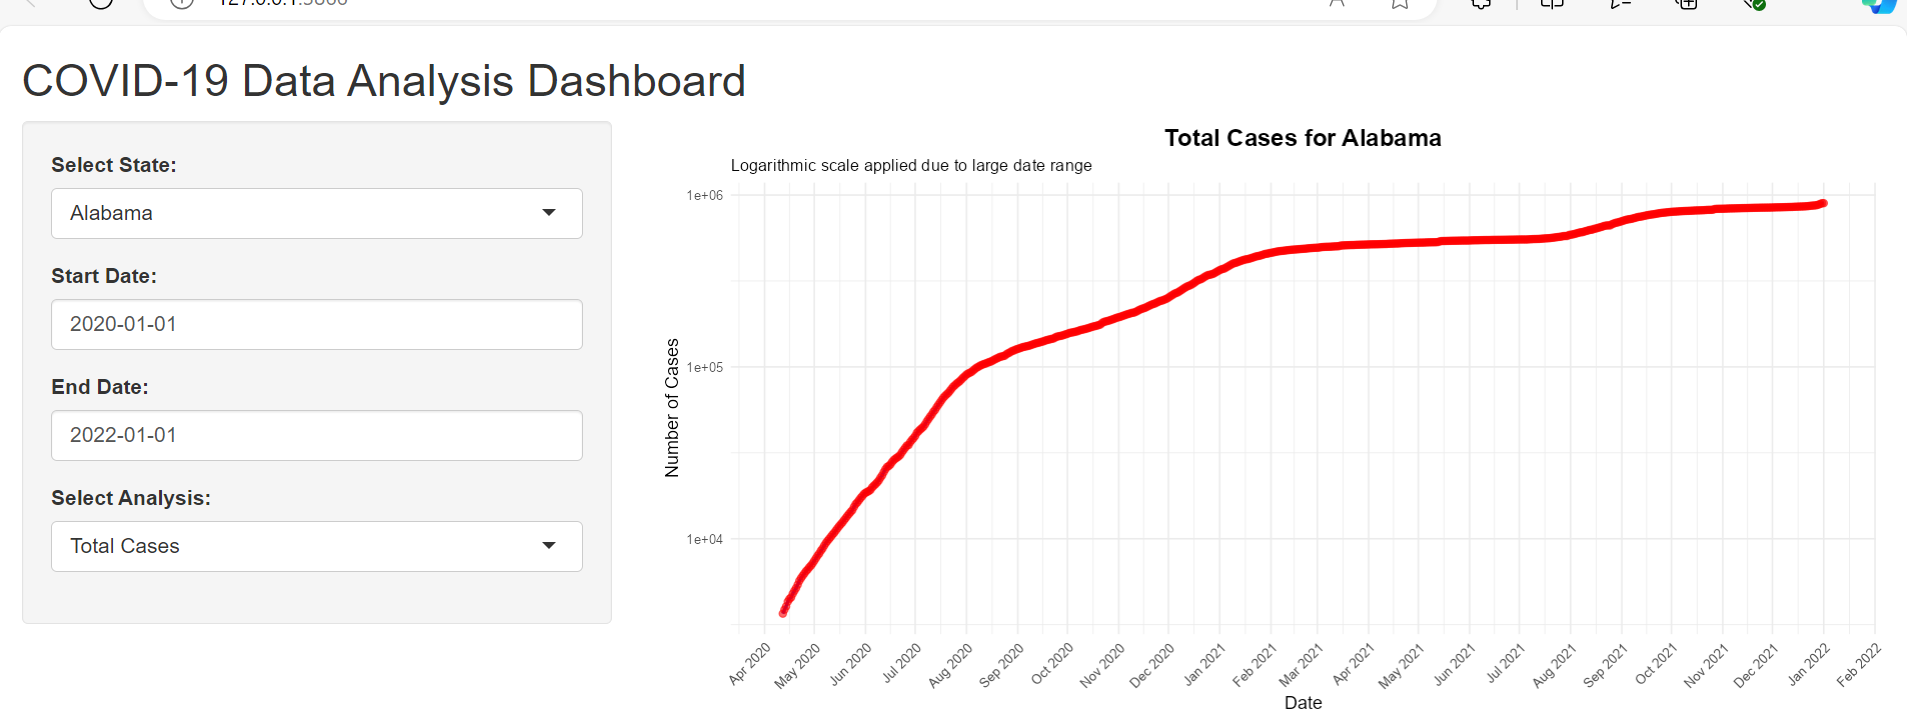
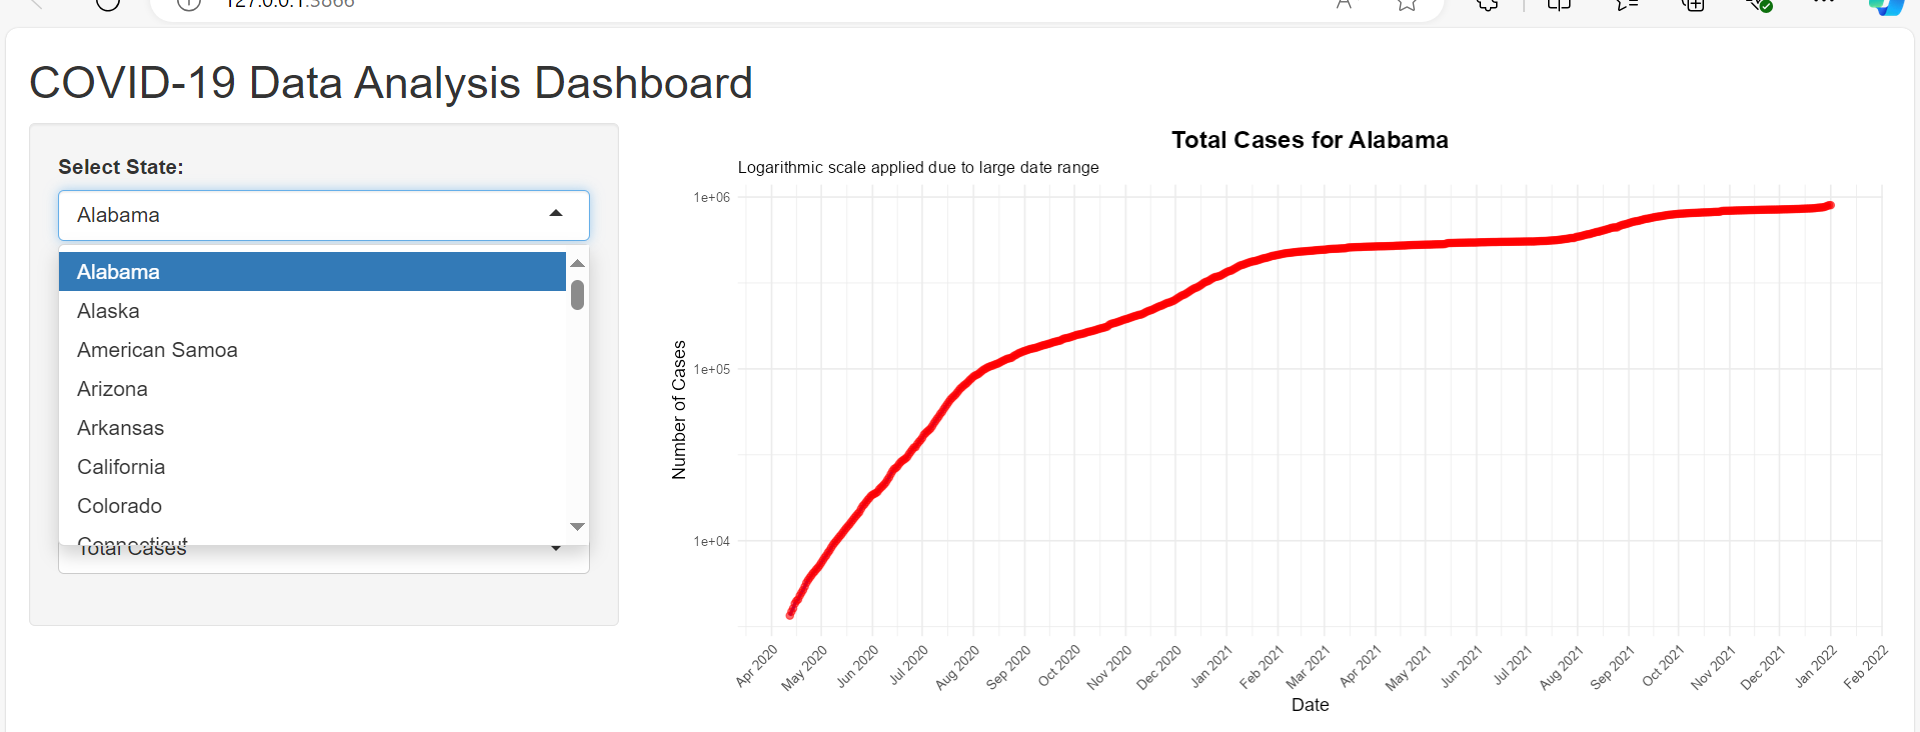
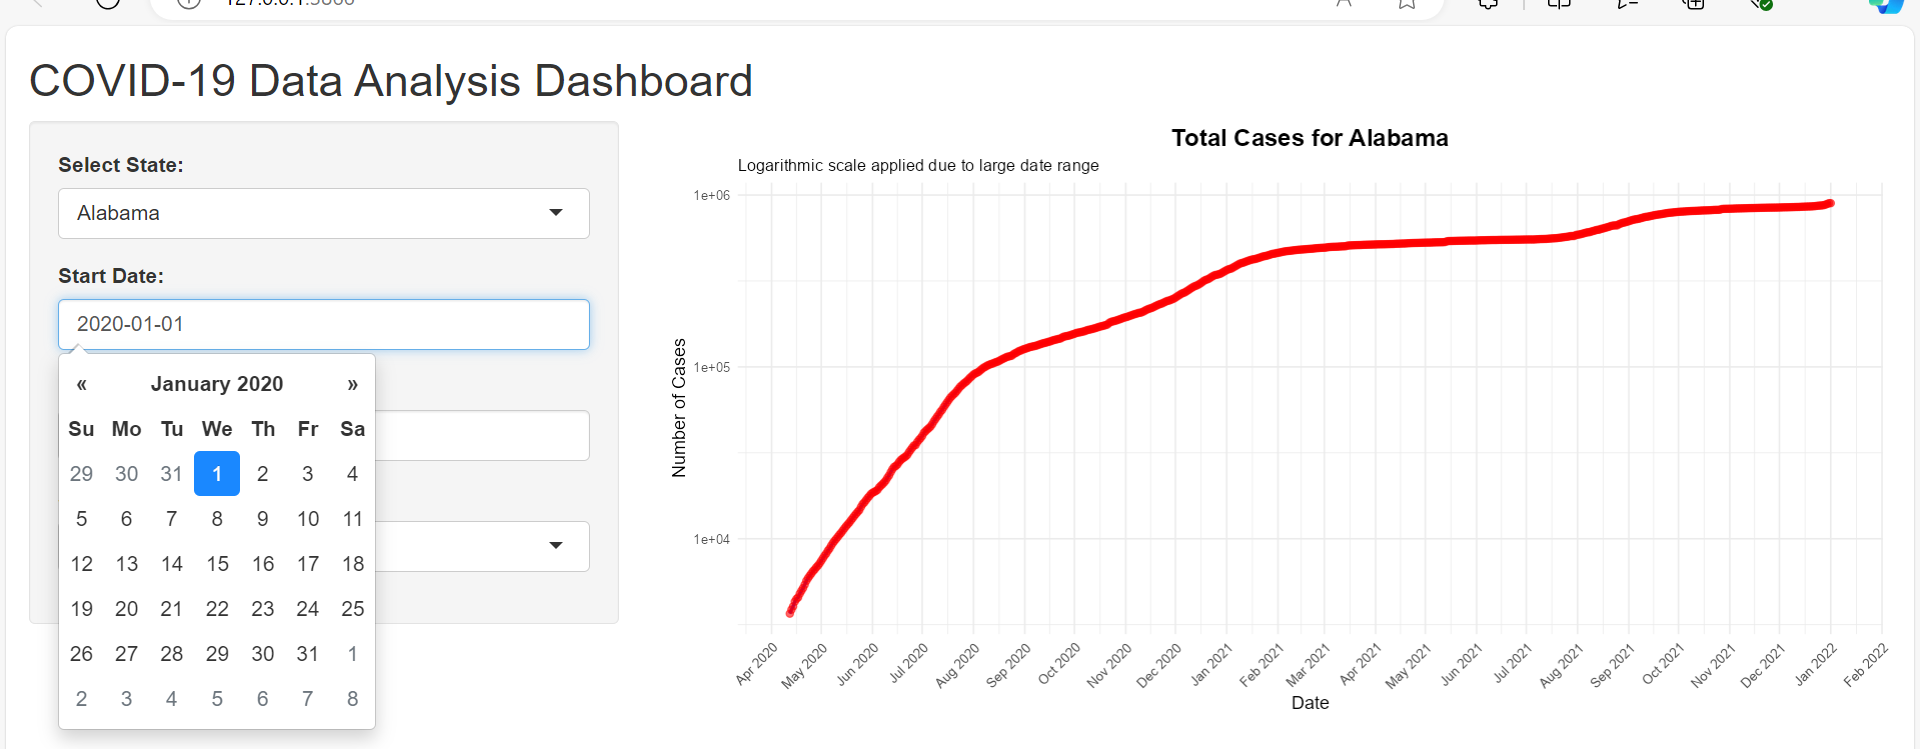
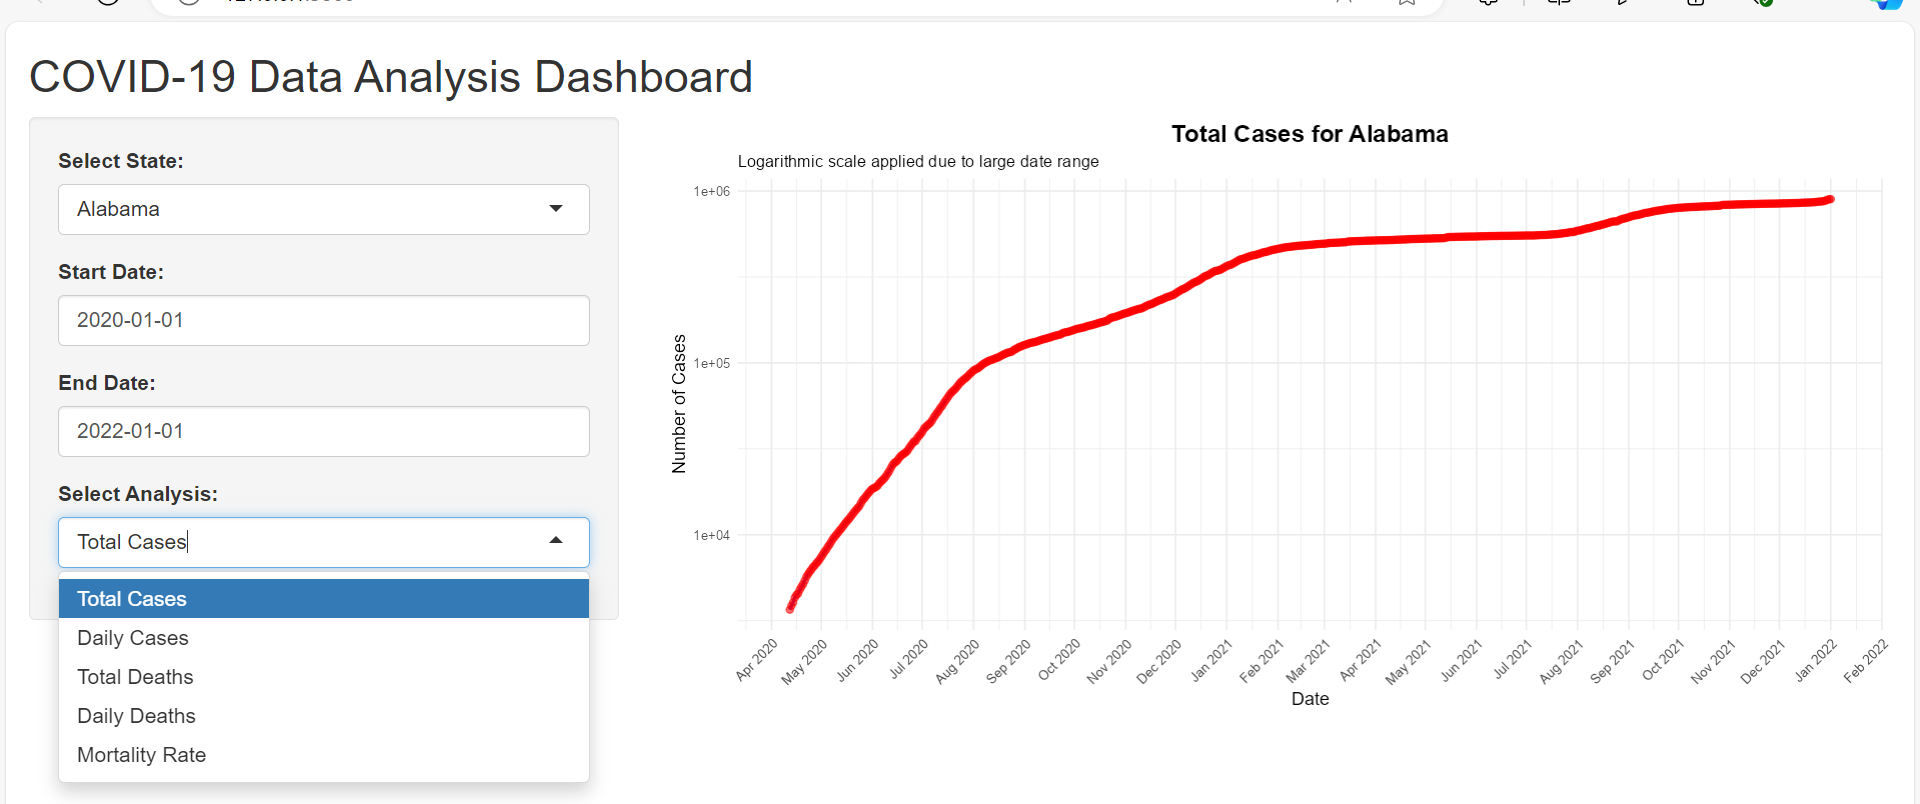

---
## **Section 6: References**

1. **Data Source**  
   - COVID-19 data was collected from the [Johns Hopkins CSSE COVID-19 GitHub Repository](https://github.com/CSSEGISandData/COVID-19).

2. **Libraries Used**  
   - **tidyverse**: For data manipulation and cleaning ([CRAN Link](https://cran.r-project.org/web/packages/tidyverse/index.html)).  
   - **lubridate**: For handling and parsing date-time data ([CRAN Link](https://cran.r-project.org/web/packages/lubridate/index.html)).  
   - **shiny**: For building interactive web applications ([CRAN Link](https://cran.r-project.org/web/packages/shiny/index.html)).  
   - **ggplot2**: For creating visualizations ([CRAN Link](https://cran.r-project.org/web/packages/ggplot2/index.html)).  
   - **readr**: For reading and writing data ([CRAN Link](https://cran.r-project.org/web/packages/readr/index.html)).

3. **Shiny Dashboard**  
   - Documentation and tutorials for Shiny dashboards can be found at the official [Shiny RStudio Website](https://shiny.rstudio.com/).

4. **Tools and Platforms**  
   - The project was developed using **R** and **RStudio** with integration into **VSCode** for Jupyter Notebook.  
   - Deployment and testing were performed using **shinyapps.io** ([Link](https://www.shinyapps.io/)).
